# [Scene Recognition with Bag-of-Words](https://www.cc.gatech.edu/~zlv30/courses/proj4.html)
For this project, you will need to report performance for three
combinations of features / classifiers. It is suggested you code them in
this order, as well:
1. Tiny image features and nearest neighbor classifier
2. Bag of sift features and nearest neighbor classifier
3. Bag of sift features and linear SVM classifier

The starter code is initialized to 'placeholder' just so that the starter
code does not crash when run unmodified and you can get a preview of how
results are presented.

## Setup

In [1]:
# Set up parameters, image paths and category list
%matplotlib notebook
%load_ext autoreload
%autoreload 2

import cv2
import time
import numpy as np
import os.path as osp
import pickle
from random import shuffle
import matplotlib.pyplot as plt
from utils import *
import student_code as sc
from sklearn.model_selection import train_test_split

# This is the list of categories / directories to use. The categories are
# somewhat sorted by similarity so that the confusion matrix looks more
# structured (indoor and then urban and then rural).
categories = ['Kitchen', 'Store', 'Bedroom', 'LivingRoom', 'Office', 'Industrial', 'Suburb',
              'InsideCity', 'TallBuilding', 'Street', 'Highway', 'OpenCountry', 'Coast',
              'Mountain', 'Forest'];
# This list of shortened category names is used later for visualization
abbr_categories = ['Kit', 'Sto', 'Bed', 'Liv', 'Off', 'Ind', 'Sub',
                   'Cty', 'Bld', 'St', 'HW', 'OC', 'Cst',
                   'Mnt', 'For'];

# Number of training examples per category to use. Max is 100. For
# simplicity, we assume this is the number of test cases per category, as
# well.
num_train_per_cat = 100

# This function returns lists containing the file path for each train
# and test image, as well as lists with the label of each train and
# test image. By default all four of these lists will have 1500 elements
# where each element is a string.
data_path = osp.join('..', 'data')
train_image_paths, test_image_paths, train_labels, test_labels = get_image_paths(data_path,
                                                                                 categories,
                                                                                 num_train_per_cat);

## Section 1: Tiny Image features with Nearest Neighbor classifier

### Section 1a: Represent each image with the Tiny Image feature

Each function to construct features should return an N x d numpy array, where N is the number of paths passed to the function and d is the dimensionality of each image representation. See the starter code for each function for more details.

In [2]:
print('Using the TINY IMAGE representation for images')
t = time.time()
patch_size = 16
train_image_feats = sc.get_tiny_images(train_image_paths, patch_size)
test_image_feats = sc.get_tiny_images(test_image_paths, patch_size)
t = time.time() - t
print('{:f} seconds'.format(t))

Using the TINY IMAGE representation for images
9.659595 seconds


### Section 1b: Classify each test image by training and using the Nearest Neighbor classifier

Each function to classify test features will return an N element list, where N is the number of test cases and each entry is a string indicating the predicted category for each test image. Each entry in 'predicted_categories' must be one of the 15 strings in 'categories', 'train_labels', and 'test_labels'. See the starter code for each function for more details.

In [4]:
print('Using NEAREST NEIGHBOR classifier to predict test set categories')
predicted_categories = sc.nearest_neighbor_classify(train_image_feats, train_labels, test_image_feats, k_size=1, DM=2)

Using NEAREST NEIGHBOR classifier to predict test set categories


### Section 1c: Build a confusion matrix and score the recognition system

(You do not need to code anything in this section.)

If we wanted to evaluate our recognition method properly we would train
and test on many random splits of the data. You are not required to do so
for this project.

This function will create a confusion matrix and various image
thumbnails each time it is called. View the confusion matrix to help interpret
your classifier performance. Where is it making mistakes? Are the
confusions reasonable?

Interpreting your performance with 100 training examples per category:
- accuracy  =   0 -> Your code is broken (probably not the classifier's fault! A classifier would have to be amazing to perform this badly).
- accuracy ~= .07 -> Your performance is chance. Something is broken or you ran the starter code unchanged.
- accuracy ~= .20 -> Rough performance with tiny images and nearest neighbor classifier. Performance goes up a few percentage points with K-NN instead of 1-NN.
- accuracy ~= .20 -> Rough performance with tiny images and linear SVM classifier. The linear classifiers will have a lot of trouble trying to separate the classes and may be unstable (e.g. everything classified to one category)
- accuracy ~= .50 -> Rough performance with bag of SIFT and nearest neighbor classifier. Can reach .60 with K-NN and different distance metrics.
- accuracy ~= .60 -> You've gotten things roughly correct with bag of SIFT and a linear SVM classifier.
- accuracy >= .70 -> You've also tuned your parameters well. E.g. number of clusters, SVM regularization, number of patches sampled when building vocabulary, size and step for dense SIFT features.
- accuracy >= .80 -> You've added in spatial information somehow or you've added additional, complementary image features. This represents state of the art in Lazebnik et al 2006.
- accuracy >= .85 -> You've done extremely well. This is the state of the art in the 2010 SUN database paper from fusing many  features. Don't trust this number unless you actually measure many random splits.
- accuracy >= .90 -> You used modern deep features trained on much larger image databases.
- accuracy >= .96 -> You can beat a human at this task. This isn't a realistic number. Some accuracy calculation is broken or your classifier is cheating and seeing the test labels.

<IPython.core.display.Javascript object>


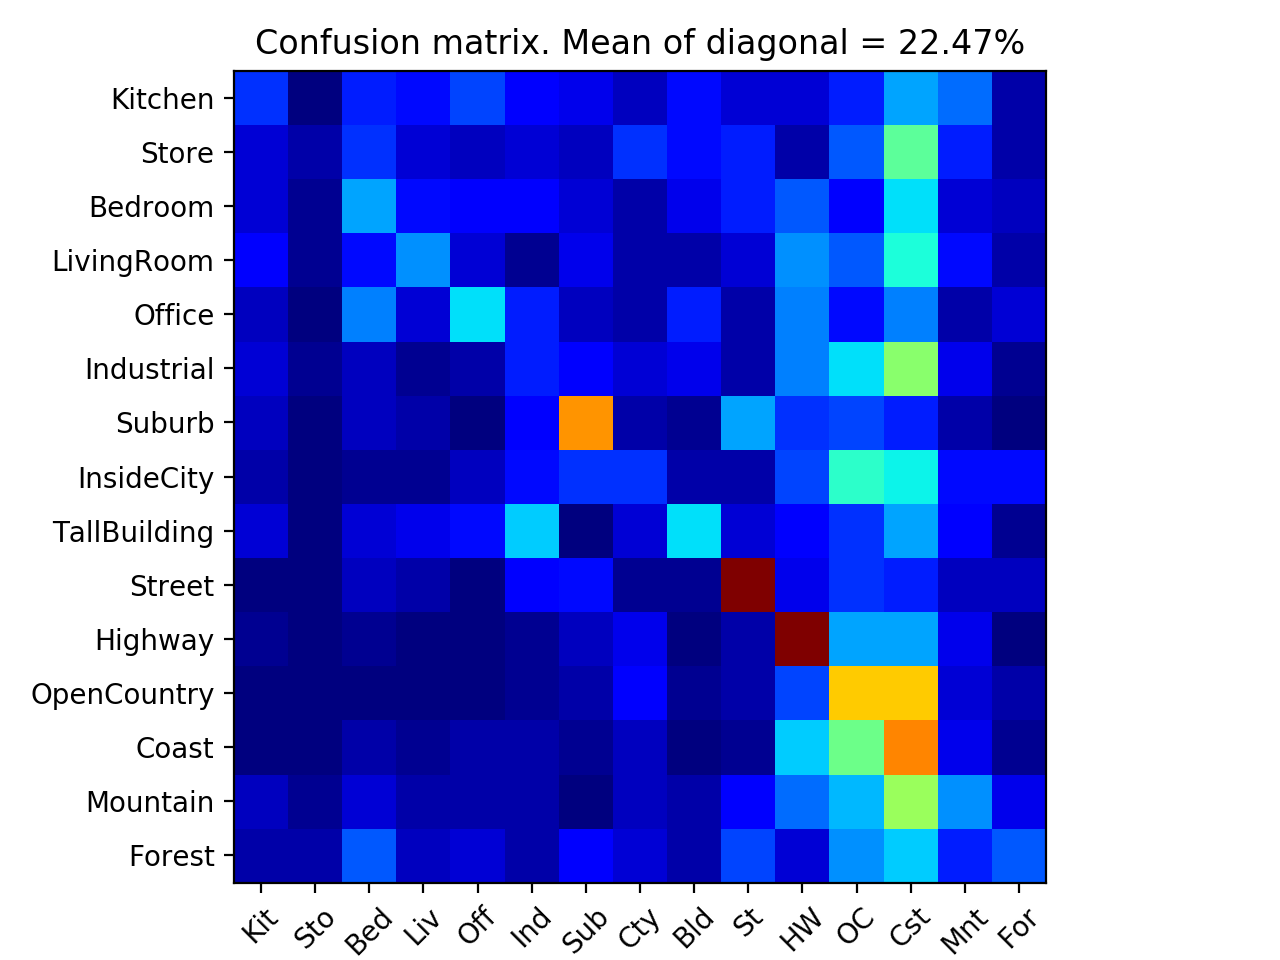

In [5]:
show_results(train_image_paths, test_image_paths, train_labels, test_labels, categories, abbr_categories,
             predicted_categories)

## Section 2: Bag of SIFT features with Nearest Neighbor classifier

### Section 2a: Represent each image with the Bag of SIFT feature

To create a new vocabulary, make sure `vocab_filename` is different than the old vocabulary, or delete the old one.

In [6]:
print('Using the BAG-OF-SIFT representation for images')

t = time.time()
vocab_filename = 'vocab_200.pkl'
if not osp.isfile(vocab_filename):
    # Construct the vocabulary
    print('No existing visual word vocabulary found. Computing one from training images')
    vocab_size = 200  # Larger values will work better (to a point) but be slower to compute
    vocab = sc.build_vocabulary(train_image_paths, vocab_size)
    with open(vocab_filename, 'wb') as f:
        pickle.dump(vocab, f)
        print('{:s} saved'.format(vocab_filename))
t = time.time() - t
print('{:f} seconds'.format(t))
t = time.time()
train_image_feats = sc.get_bags_of_sifts(train_image_paths, vocab_filename)
test_image_feats = sc.get_bags_of_sifts(test_image_paths, vocab_filename)
t = time.time() - t
print('{:f} seconds'.format(t))

Using the BAG-OF-SIFT representation for images
0.000241 seconds
132.742318 seconds


### Section 2b: Classify each test image by training and using the Nearest Neighbor classifier

In [7]:
print('Using NEAREST NEIGHBOR classifier to predict test set categories')
predicted_categories = sc.nearest_neighbor_classify(train_image_feats, train_labels, test_image_feats, k_size=5, DM=1)

Using NEAREST NEIGHBOR classifier to predict test set categories


### Section 2c: Build a confusion matrix and score the recognition system

<IPython.core.display.Javascript object>


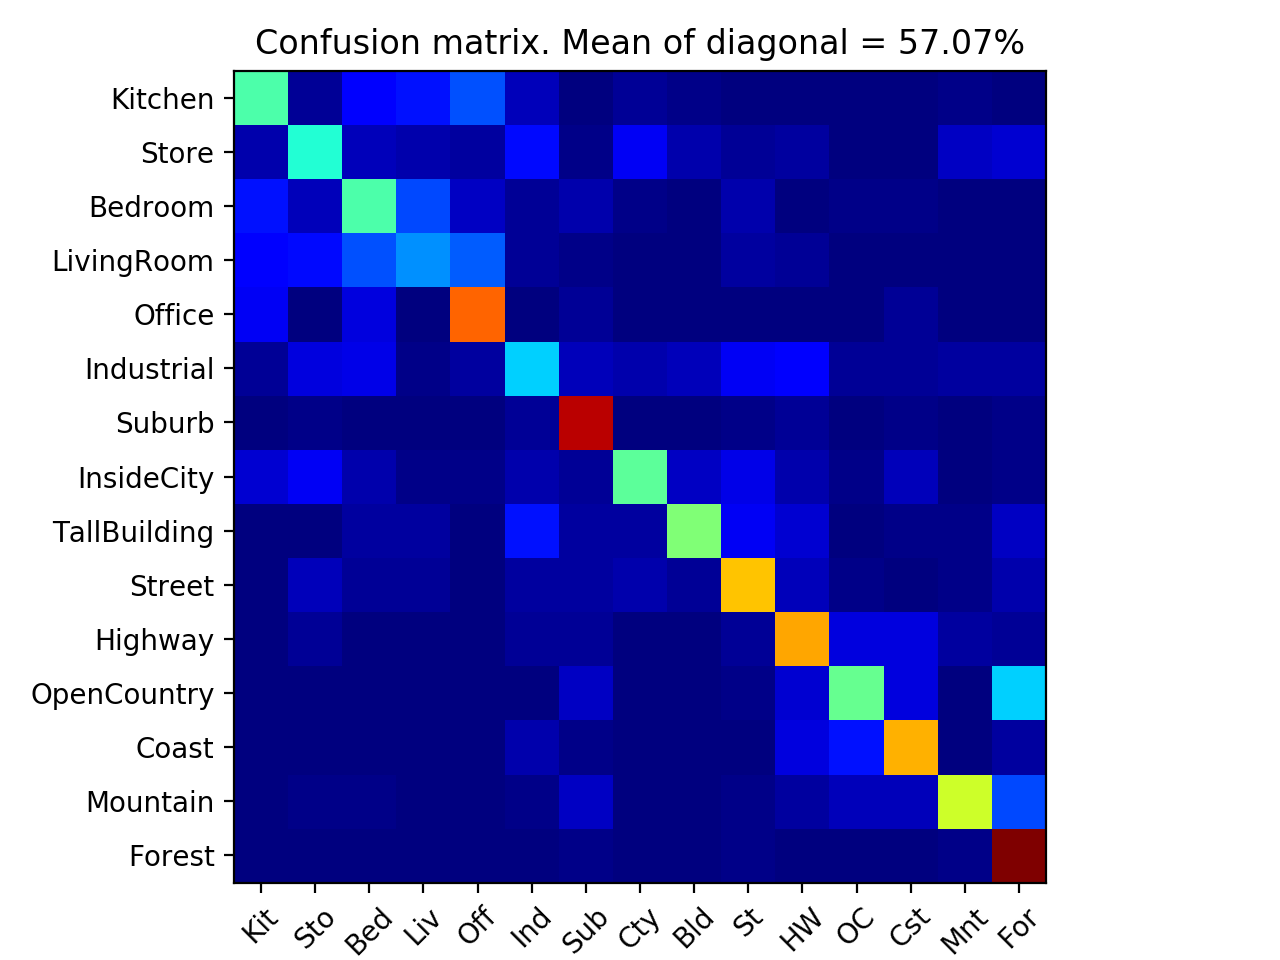

In [16]:
show_results(train_image_paths, test_image_paths, train_labels, test_labels, categories, abbr_categories,
             predicted_categories)

## Section 3: Bag of SIFT features and SVM classifier
We will reuse the bag of SIFT features from Section 2a.

The difference is that this time we will classify them with a support vector machine (SVM).

### Section 3a: Classify each test image by training and using the SVM classifiers

In [17]:
print('Using SVM classifier to predict test set categories')
predicted_categories = sc.svm_classify(train_image_feats, train_labels, test_image_feats)

Using SVM classifier to predict test set categories


### Section 3b: Build a confusion matrix and score the recognition system

<IPython.core.display.Javascript object>


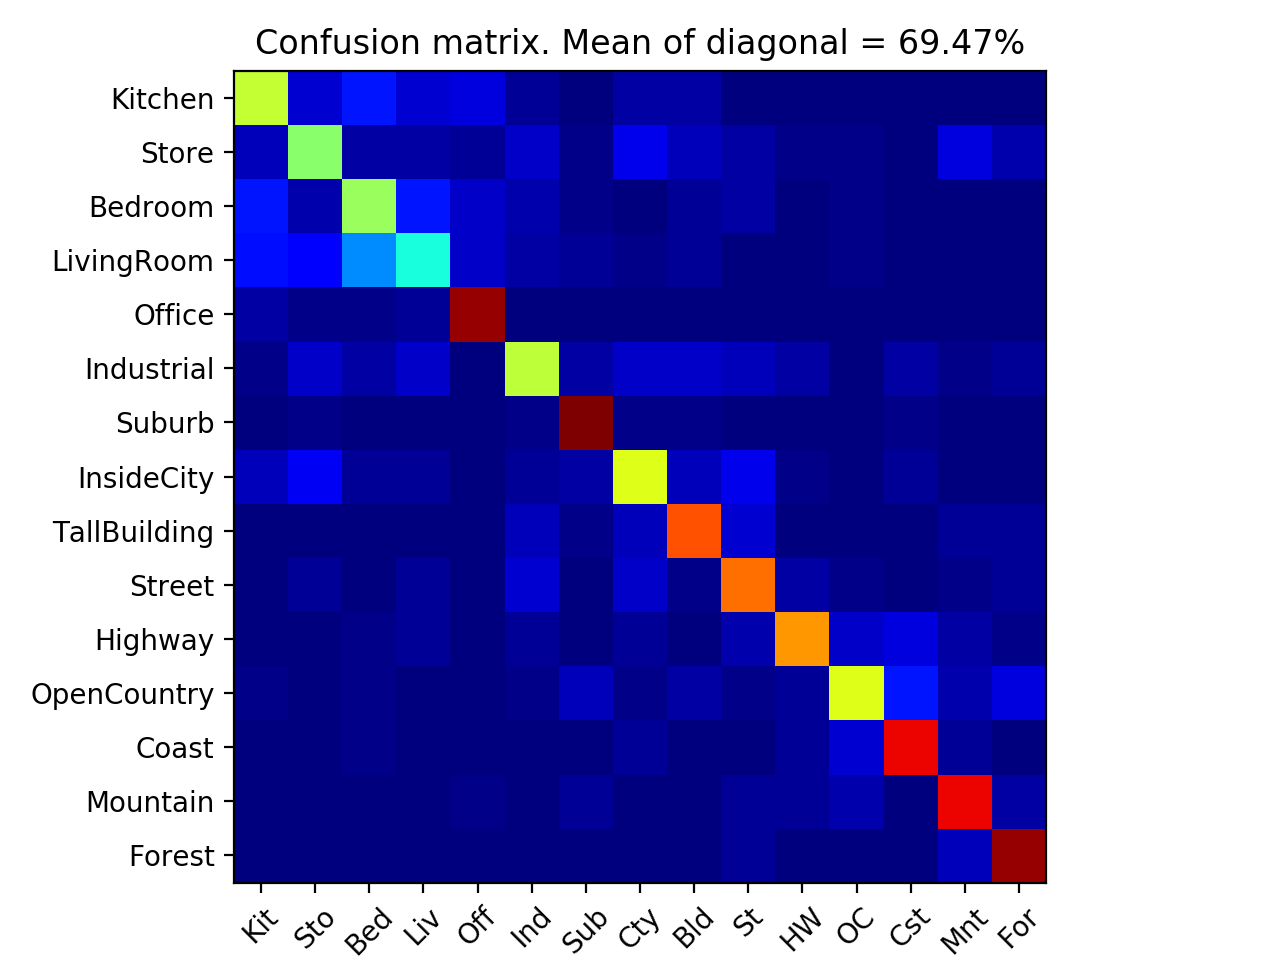

In [18]:
show_results(train_image_paths, test_image_paths, train_labels, test_labels, categories, abbr_categories,
             predicted_categories)

# Analysis

#### 1) Describe your Tiny image feature classification pipeline ? Compare the confusion matrix using two different values of k in KNN. Try different distance matrix apart from euclidian distance and illustrate the impact of it on overall result. (4 points)

In tiny image representation, the tiny image features are build by simply resizing the original image using the cv2.resize() function to a vary small fixed resolution (16x16) pixels while ignoring their aspect ratio. To improve the performance, the tiny images features are first shifted to the zero mean and then normalized.
The images are converted to a small representation, which enables faster implimentations of any learning algorithms, while preserving the image properties.

Using the TINY IMAGE representation for images
Using 1-NEAREST NEIGHBOR classifier to predict test set categories


<IPython.core.display.Javascript object>


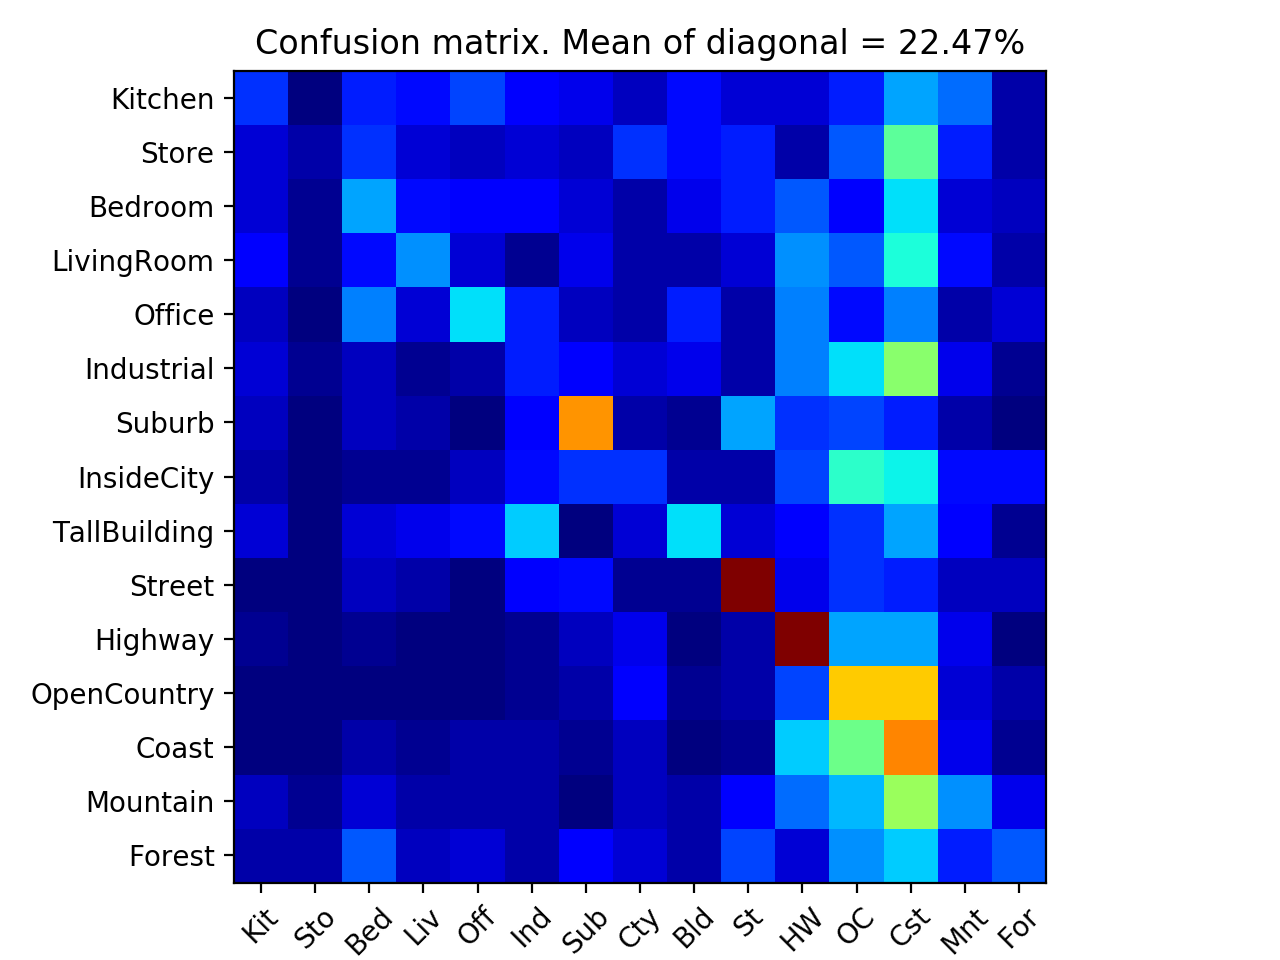

In [19]:
print('Using the TINY IMAGE representation for images')
patch_size = 16
train_image_feats = sc.get_tiny_images(train_image_paths, patch_size)
test_image_feats = sc.get_tiny_images(test_image_paths, patch_size)
print('Using 1-NEAREST NEIGHBOR classifier to predict test set categories')
predicted_categories = sc.nearest_neighbor_classify(train_image_feats, train_labels, test_image_feats, k_size=1, DM=2)
show_results(train_image_paths, test_image_paths, train_labels, test_labels, categories, abbr_categories,
             predicted_categories)

Using the TINY IMAGE representation for images
Using 3-NEAREST NEIGHBOR classifier to predict test set categories


<IPython.core.display.Javascript object>


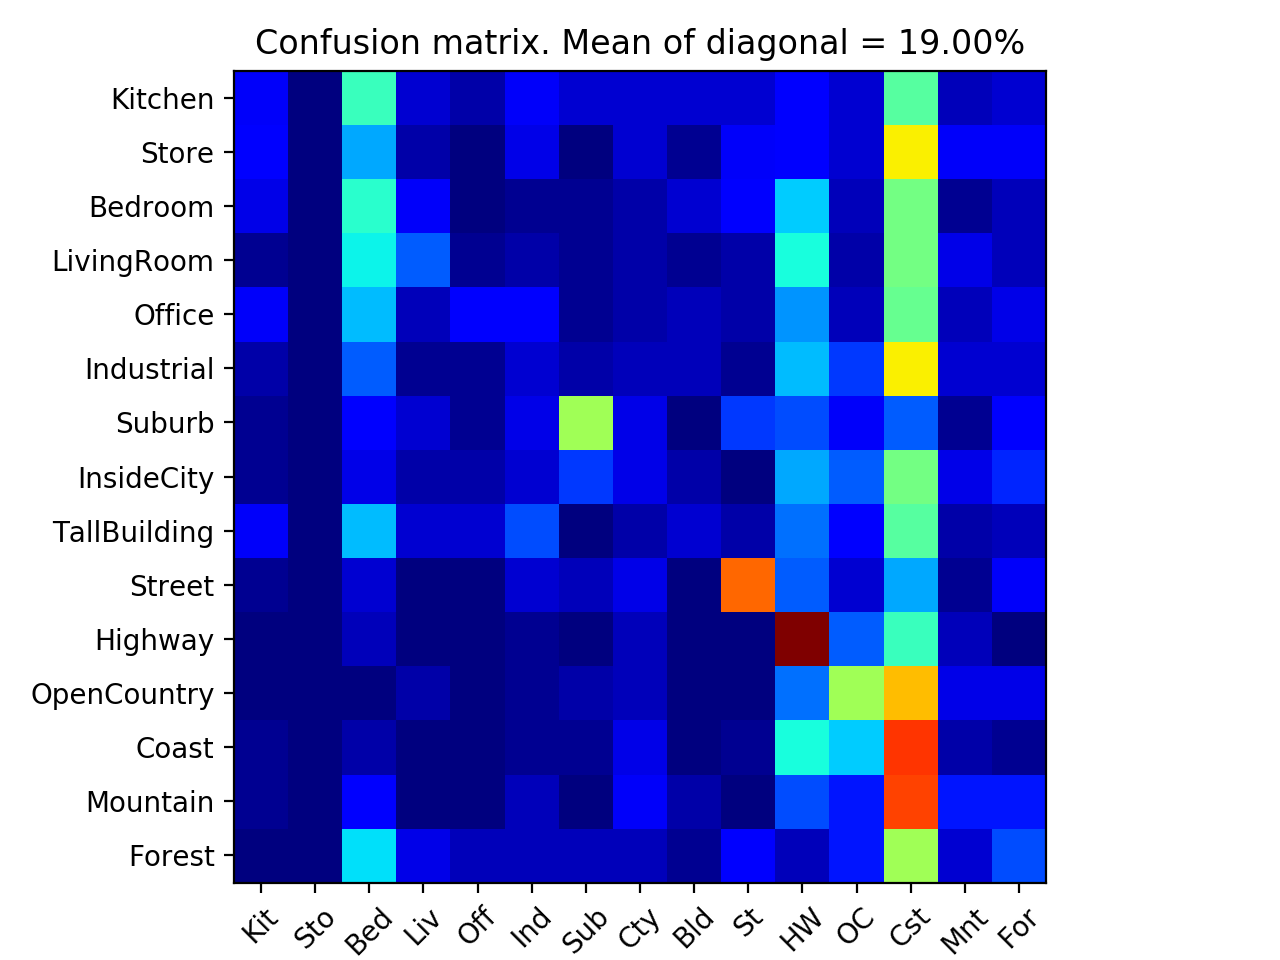

In [20]:
print('Using the TINY IMAGE representation for images')
patch_size = 16
train_image_feats = sc.get_tiny_images(train_image_paths, patch_size)
test_image_feats = sc.get_tiny_images(test_image_paths, patch_size)
print('Using 3-NEAREST NEIGHBOR classifier to predict test set categories')
predicted_categories = sc.nearest_neighbor_classify(train_image_feats, train_labels, test_image_feats, k_size=3, DM=2)
show_results(train_image_paths, test_image_paths, train_labels, test_labels, categories, abbr_categories,
             predicted_categories)

Using the TINY IMAGE representation for images
Using 1-NEAREST NEIGHBOR classifier to predict test set categories bu using Manhattan distanceas distance matrix


<IPython.core.display.Javascript object>


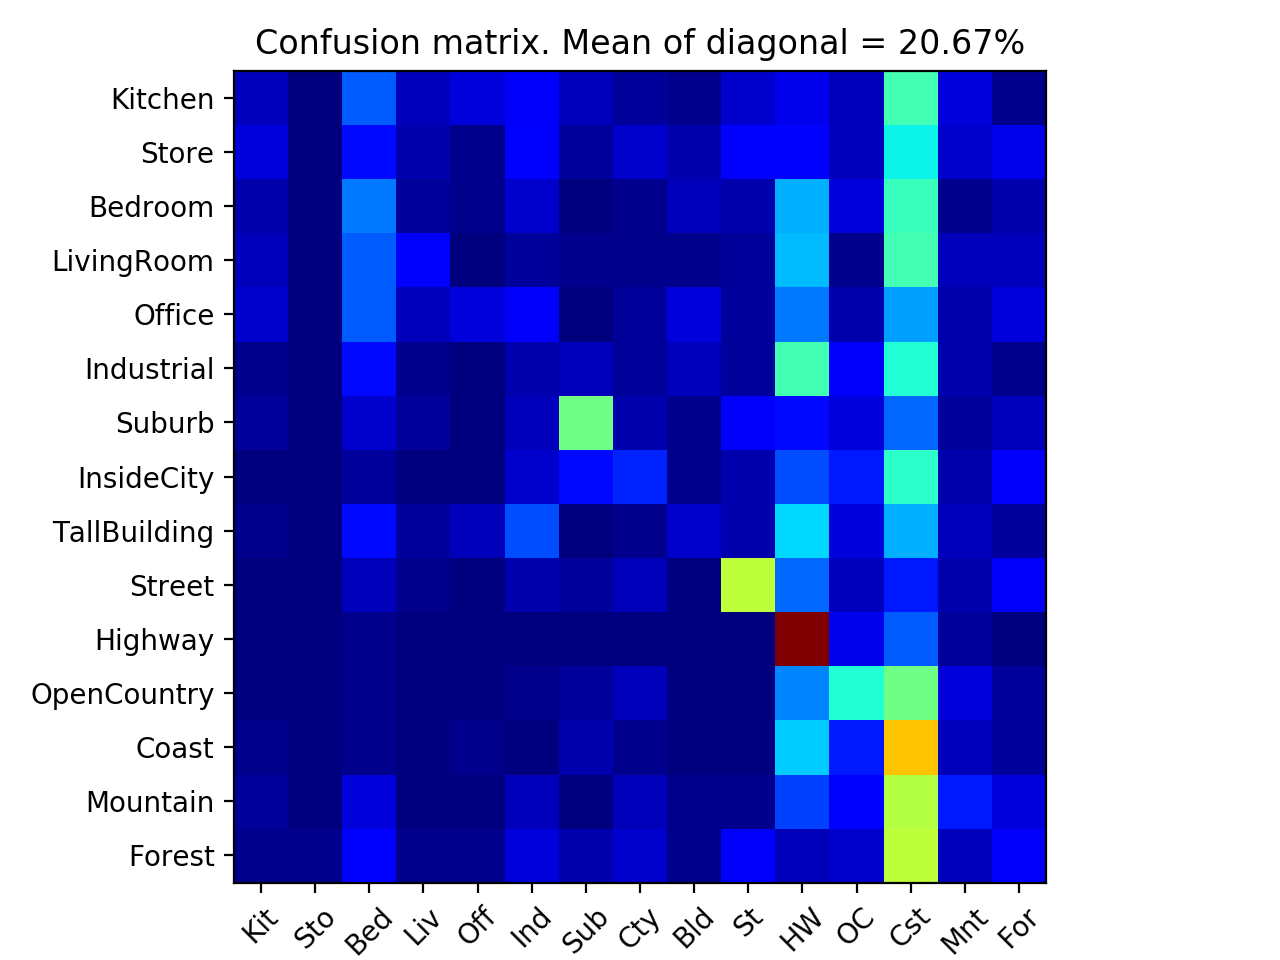

In [21]:
print('Using the TINY IMAGE representation for images')
patch_size = 16
train_image_feats = sc.get_tiny_images(train_image_paths, patch_size)
test_image_feats = sc.get_tiny_images(test_image_paths, patch_size)
print('Using 1-NEAREST NEIGHBOR classifier to predict test set categories bu using Manhattan distanceas distance matrix')
predicted_categories = sc.nearest_neighbor_classify(train_image_feats, train_labels, test_image_feats, k_size=3, DM=1)
show_results(train_image_paths, test_image_paths, train_labels, test_labels, categories, abbr_categories,
             predicted_categories)

#### Compare the confusion matrix using two different values of k in KNN. Try different distance matrix apart from euclidian distance and illustrate the impact of it on overall result. (4 points)

For k=1 the accuracy obtained is 22.47% whereas by using 3-nearest neighbor, the accuracy obtained is 19.00. Hence, 2.5% decrement in accuracy is obtained by using 3-kNN. 
By changing the distance matrix from Euclidean_distance (L2) to Manhattan_distance(L1), there is approximately 2% decrement in accuracy.

#### 2) How you build your Bag of SIFT features representation ? (2 points)

First we build a vocabulary. 
1. Dense SIFT features are extracted from all the grayscale images in the training set using vlfeat.sift.dsift(img) at every 10 steps.
2. All the features sampled are clustered with kmeans using vl_kmeans(X, K), which formed the vocabulary. The number of kmean clusters is the size of vocabulary. The Fast option is enabled to make the computation faster.

Bag of Sifts
1. The Bag of SIFT's calculates the Dense SIFT for each image, and then for each SIFT feature, assigns the nearest feature from the vocabulary. 
2. This is passed through a bincount, to identify number of times each cluster center was chosen. This created a histogram, which was then normalized. These normalized histograms were the training and test samples.

#### 3) Describe your SVM classification pipeline? Compare the results of Nearest Neighbor classifier and SVM classifer. (2 points)

The steps are defined as follows:
1. A Linear SVM is trained for every category (i.e. one vs All) using sklearn's LinearSVC() function.
2. The labels are changed to +1 if they match the category for which the SVM is being created for, or -1 if the label dont match.
2. The learned linear classifer is used to obtain confidence score for each cateogry using decision_function(). The category which has the highest confidence score is choosen as the label.

Using k-Nearest Neighbor classifer, the maximum accuracy obtained is around 55% whereas the maximum accuracy obtained using SVM classifer is obtained around 70%.

#### 4) Describe k-fold cross validation ? why validation test set is important ? (2 points)

By learning the parameters of a prediction function and then testing it on the same data is a methodological mistake. The model would just repeat the labels of the samples that it has just seen. It would have near to perfect score but would fail to predict anything useful on yet-unseen data. This situation is called overfitting. 
In k-fold Cross validation, the training set is split into k smaller sets. The following procedure is followed for each of the k “folds”:
1. A model is trained using  of the folds as training data;
2. The resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy).
The performance measure reported by k-fold cross-validation is then the average of the values computed in the loop. 

Validation set is used in order to avoid overfitting the test set. Since we cannot use the test set for the purpose of tweaking hyperparameters, valiadation set is used to tuned the hyperparameters.

#### 5) Detailed quantitative analysis showing the impact of two different hyperparameters on overall results? Describe how you tuned them? Illustrate using examples. (8 points)

The qualitative analysis is shown for the impact of two different hyperparameters for k-nearest neighbor classifier. The two hyperparameters choosen are: k vlaue and distance function (L1 norm or L2 norm).


Using the BAG-OF-SIFT representation for images and 1-NEAREST NEIGHBOR classifier with L1 as distance measure to predict test set categories


<IPython.core.display.Javascript object>


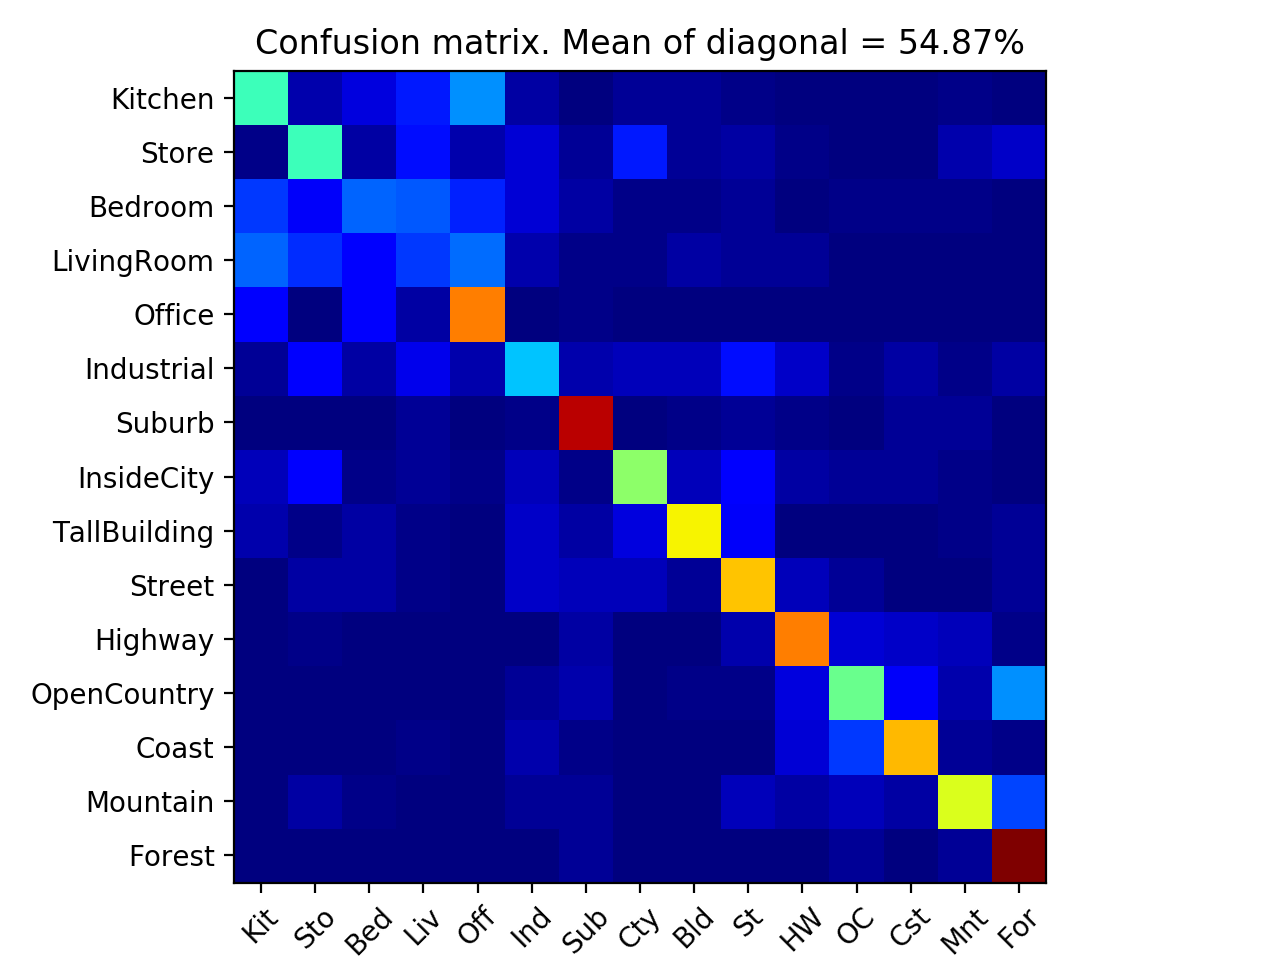

Using the BAG-OF-SIFT representation for images and 3-NEAREST NEIGHBOR classifier with L1 as distance measure to predict test set categories


<IPython.core.display.Javascript object>


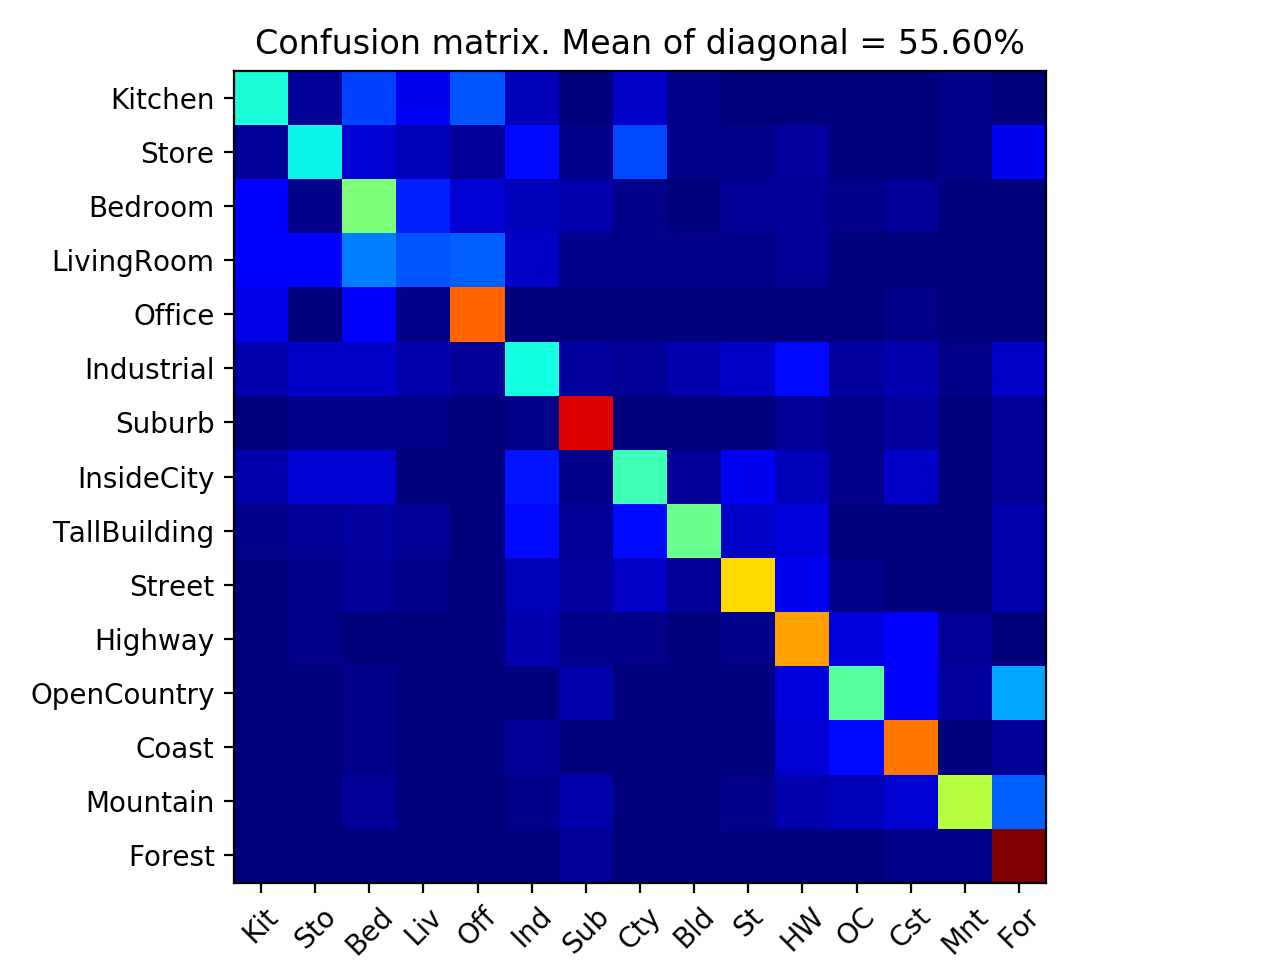

Using the BAG-OF-SIFT representation for images and 5-NEAREST NEIGHBOR classifier with L1 as distance measure to predict test set categories


<IPython.core.display.Javascript object>


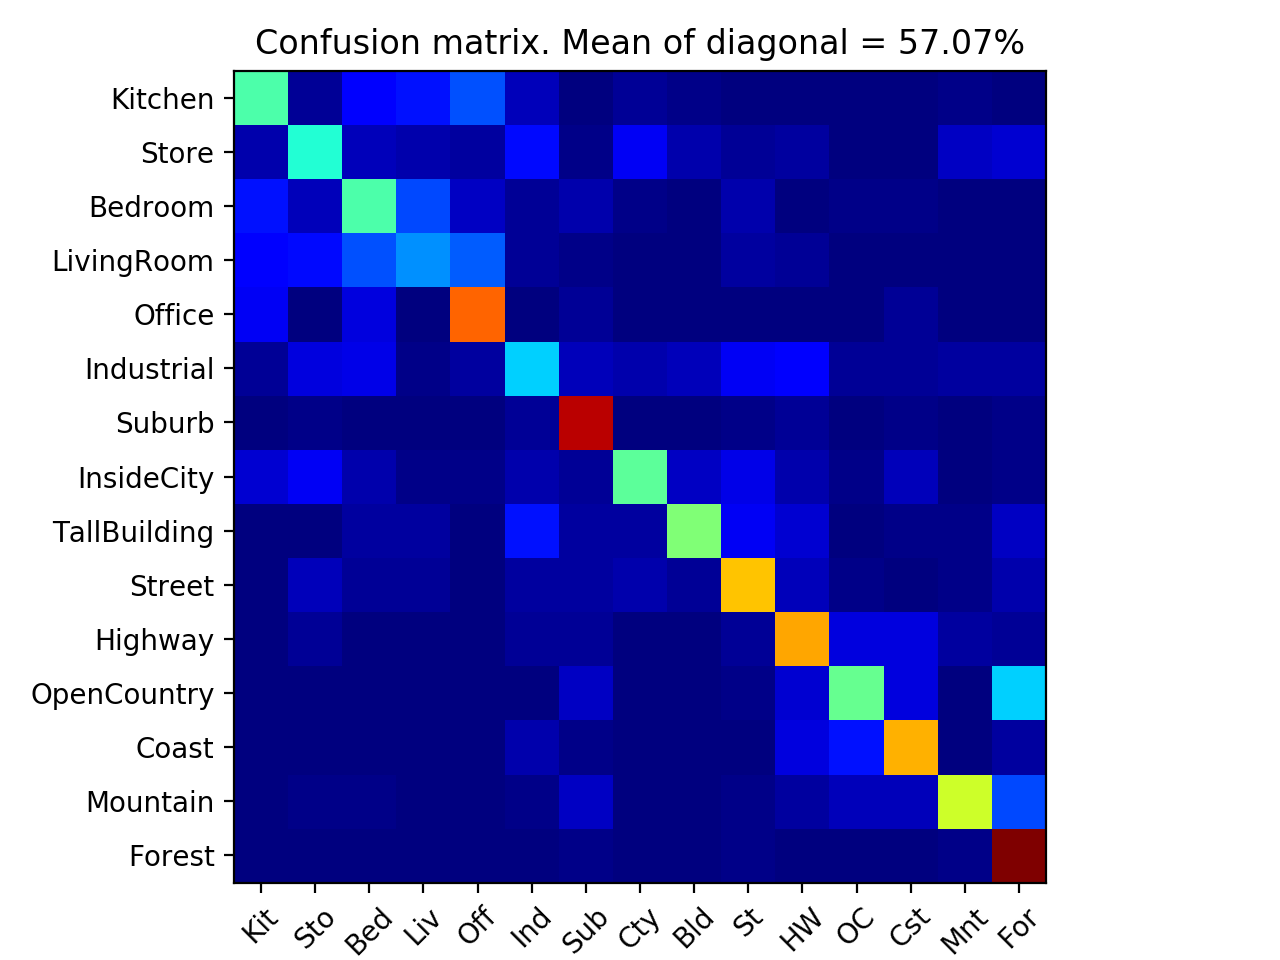

Using the BAG-OF-SIFT representation for images and 10-NEAREST NEIGHBOR classifier with L1 as distance measure to predict test set categories


<IPython.core.display.Javascript object>


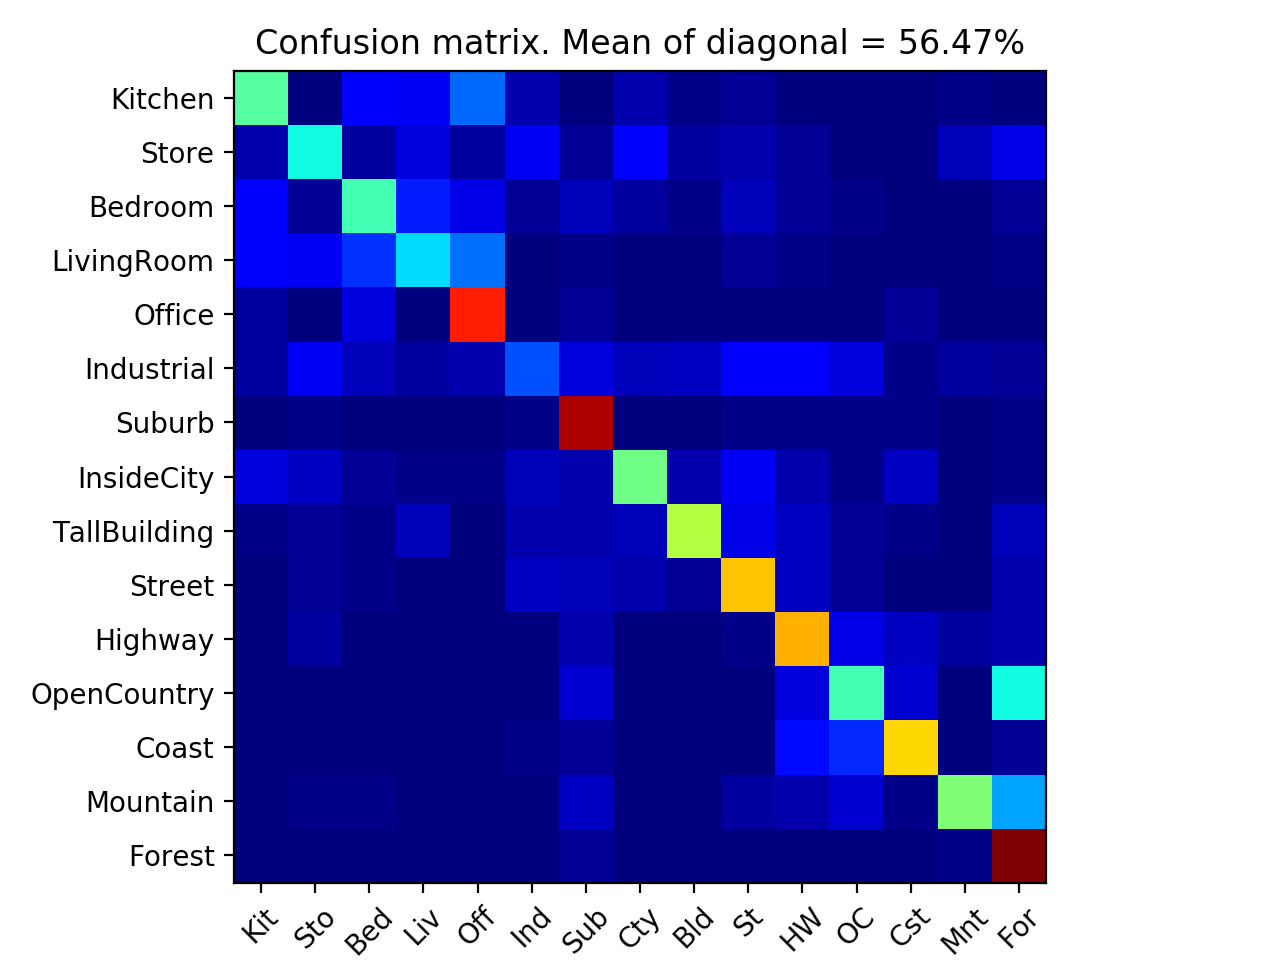

Using the BAG-OF-SIFT representation for images and 20-NEAREST NEIGHBOR classifier with L1 as distance measure to predict test set categories


<IPython.core.display.Javascript object>


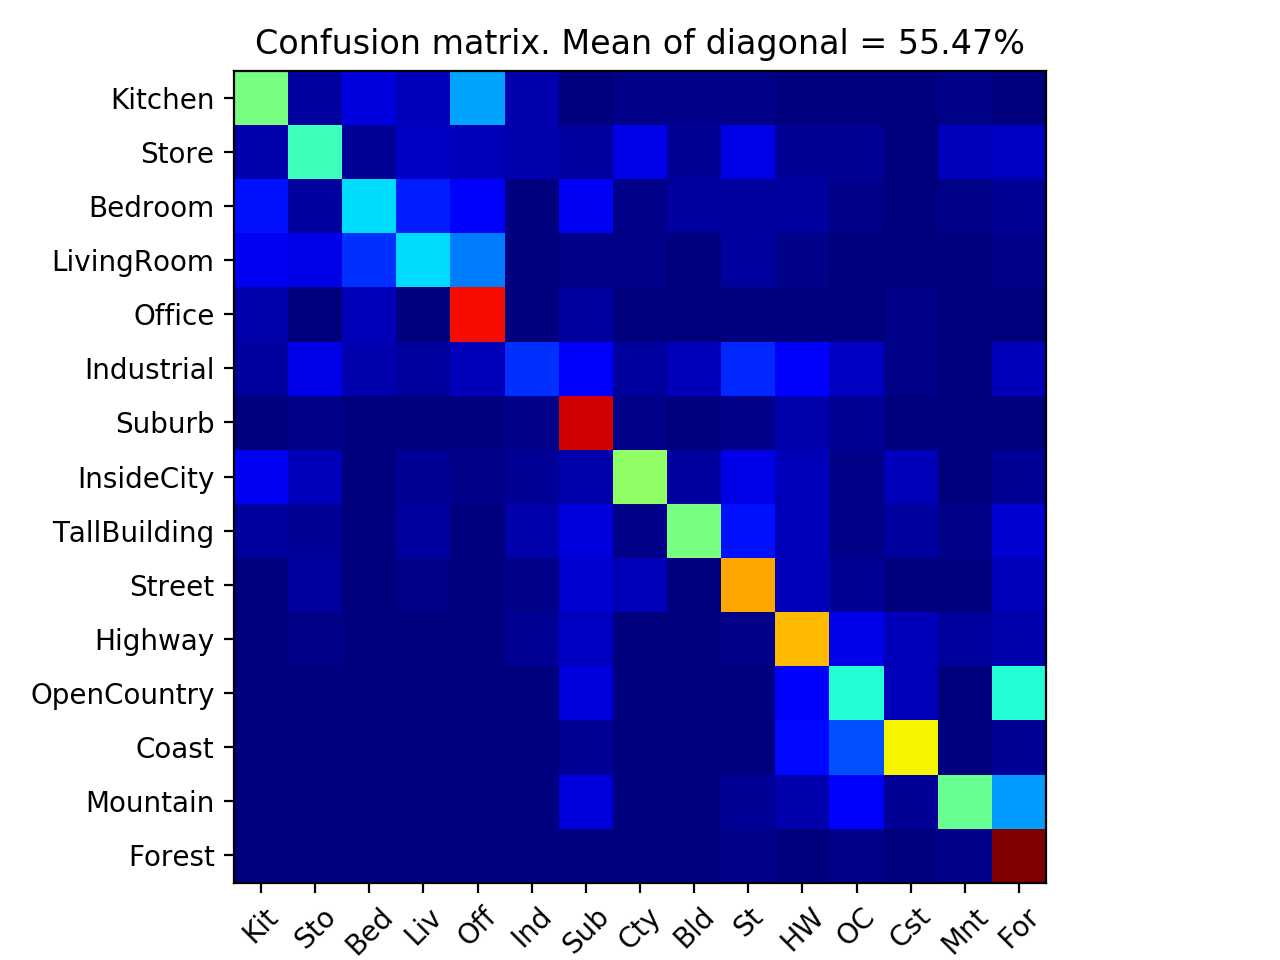

Using the BAG-OF-SIFT representation for images and 50-NEAREST NEIGHBOR classifier with L1 as distance measure to predict test set categories


<IPython.core.display.Javascript object>


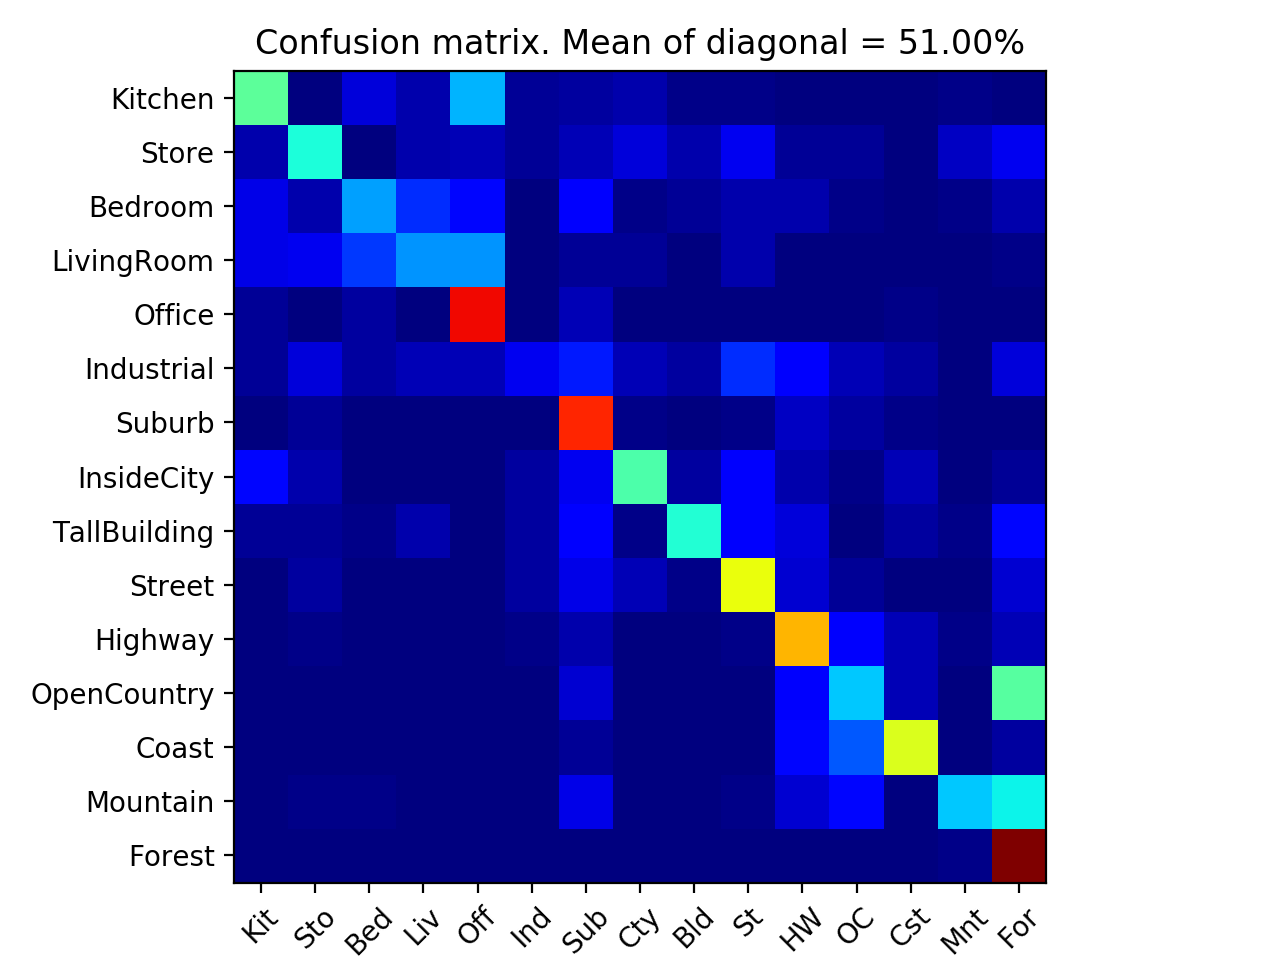

Using the BAG-OF-SIFT representation for images and 100-NEAREST NEIGHBOR classifier with L1 as distance measure to predict test set categories


<IPython.core.display.Javascript object>


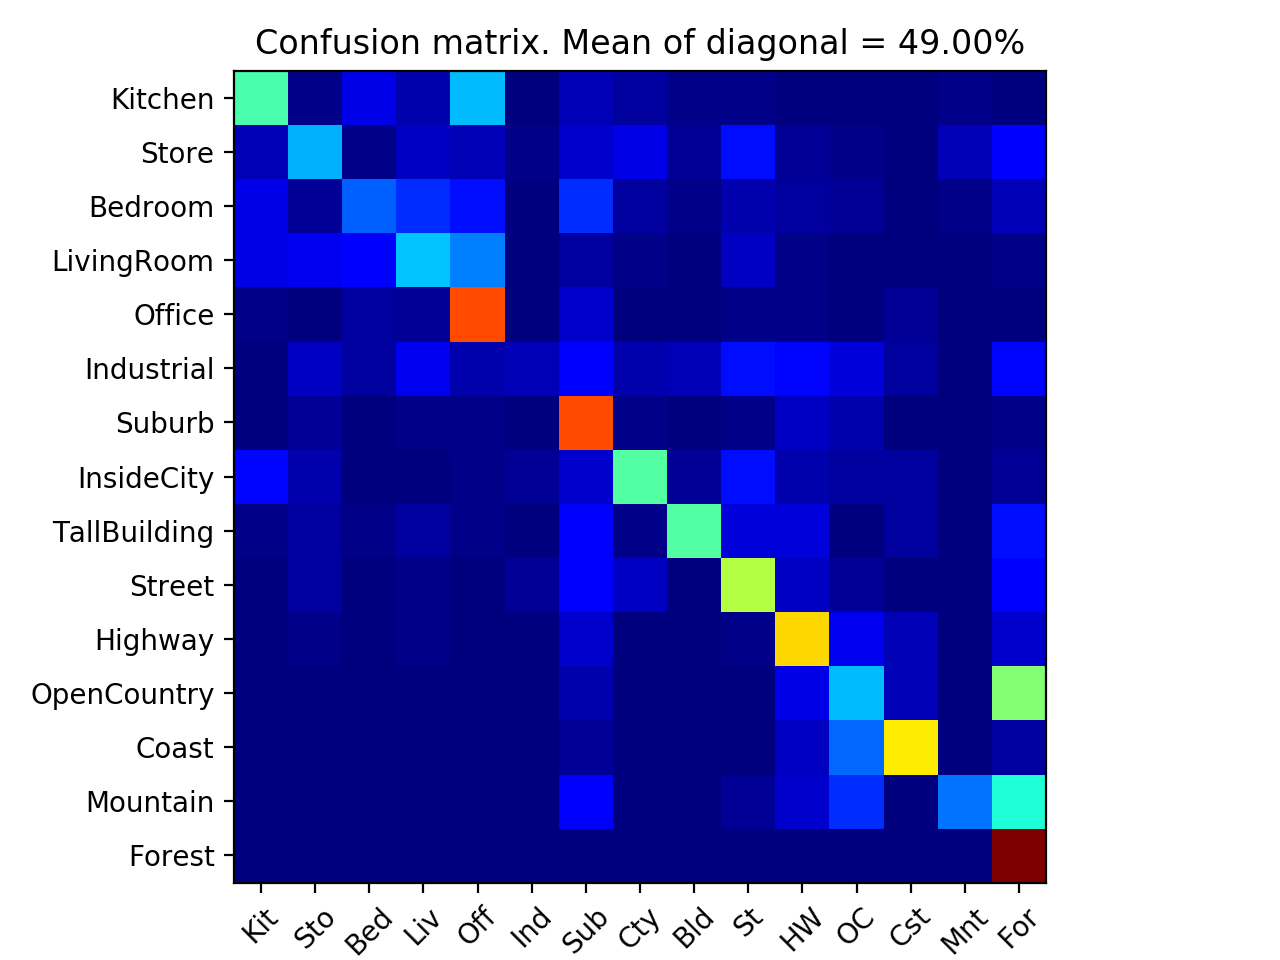

Using the BAG-OF-SIFT representation for images and 1-NEAREST NEIGHBOR classifier with L2 as distance measure to predict test set categories


<IPython.core.display.Javascript object>


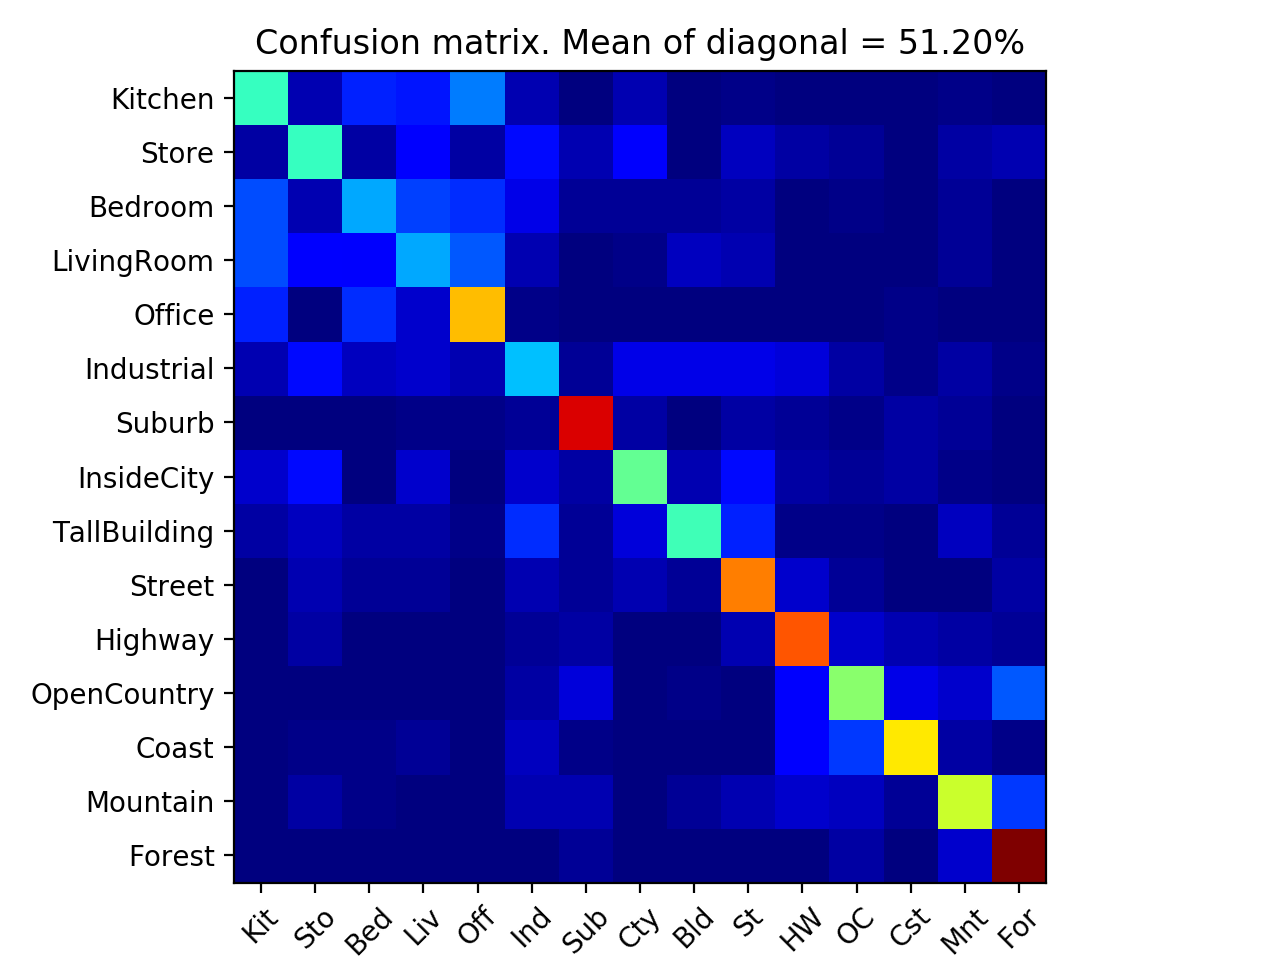

Using the BAG-OF-SIFT representation for images and 3-NEAREST NEIGHBOR classifier with L2 as distance measure to predict test set categories


<IPython.core.display.Javascript object>


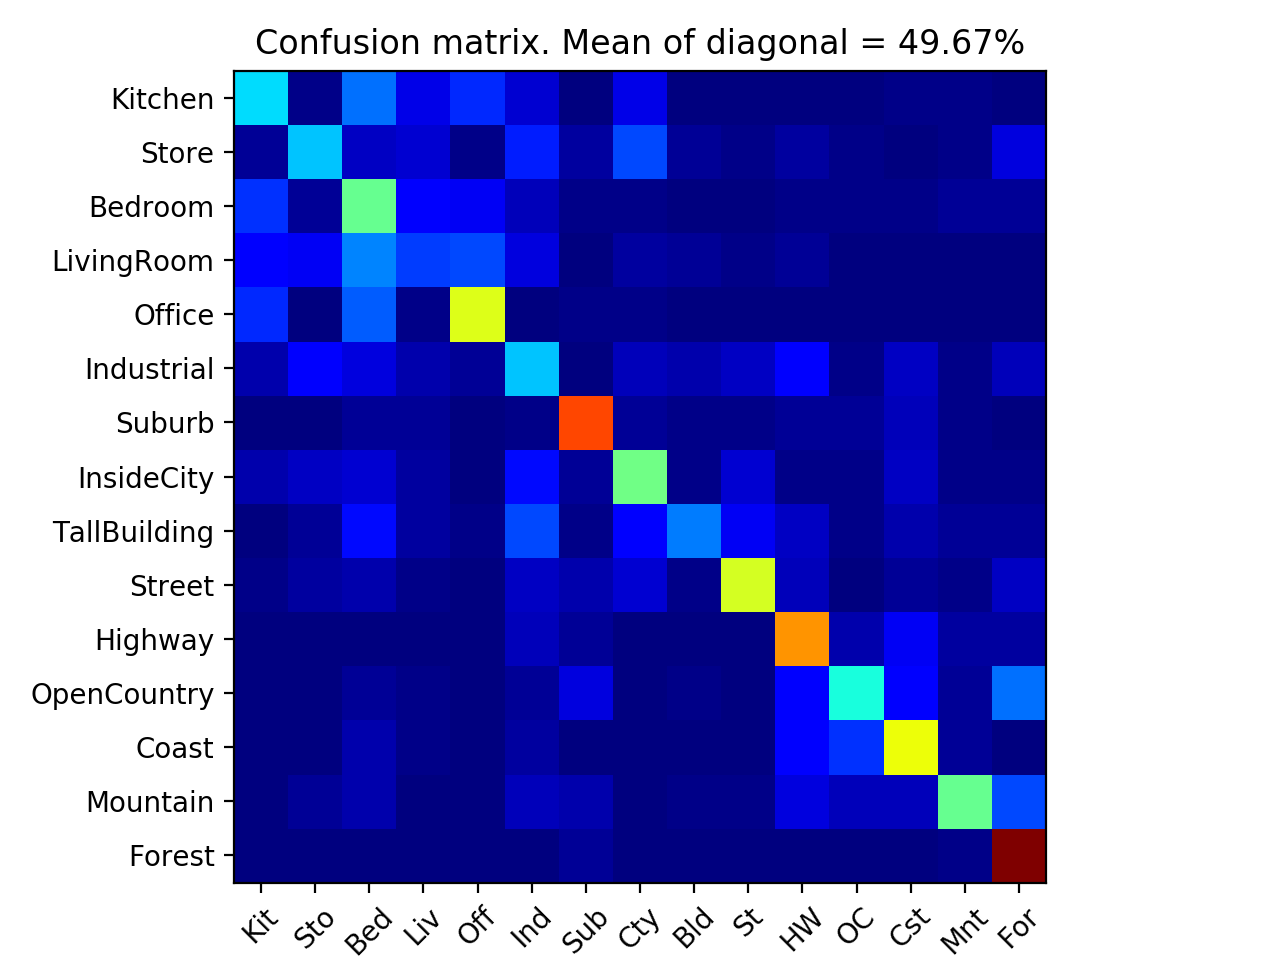

Using the BAG-OF-SIFT representation for images and 5-NEAREST NEIGHBOR classifier with L2 as distance measure to predict test set categories


<IPython.core.display.Javascript object>


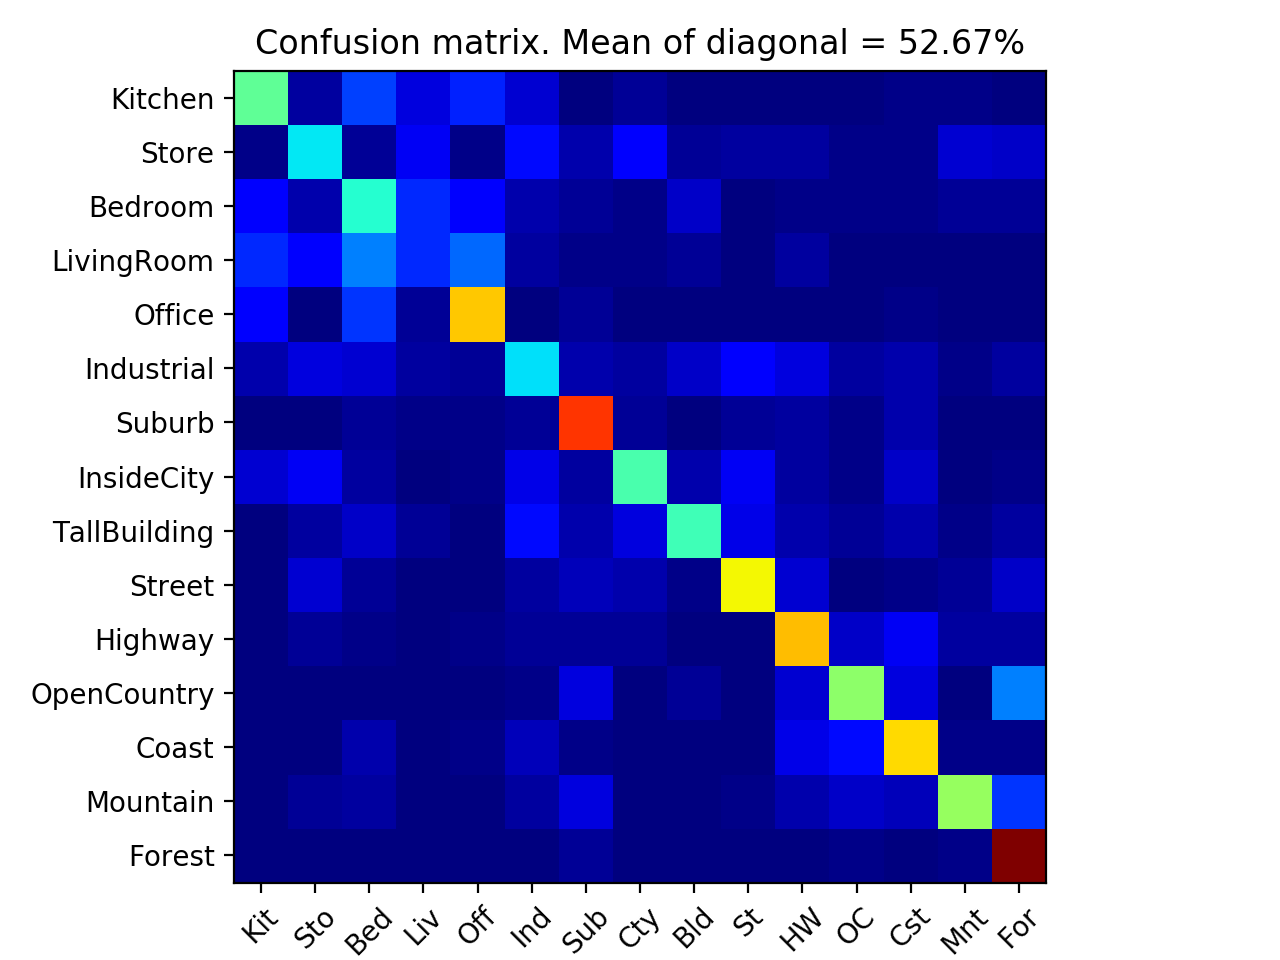

Using the BAG-OF-SIFT representation for images and 10-NEAREST NEIGHBOR classifier with L2 as distance measure to predict test set categories


<IPython.core.display.Javascript object>


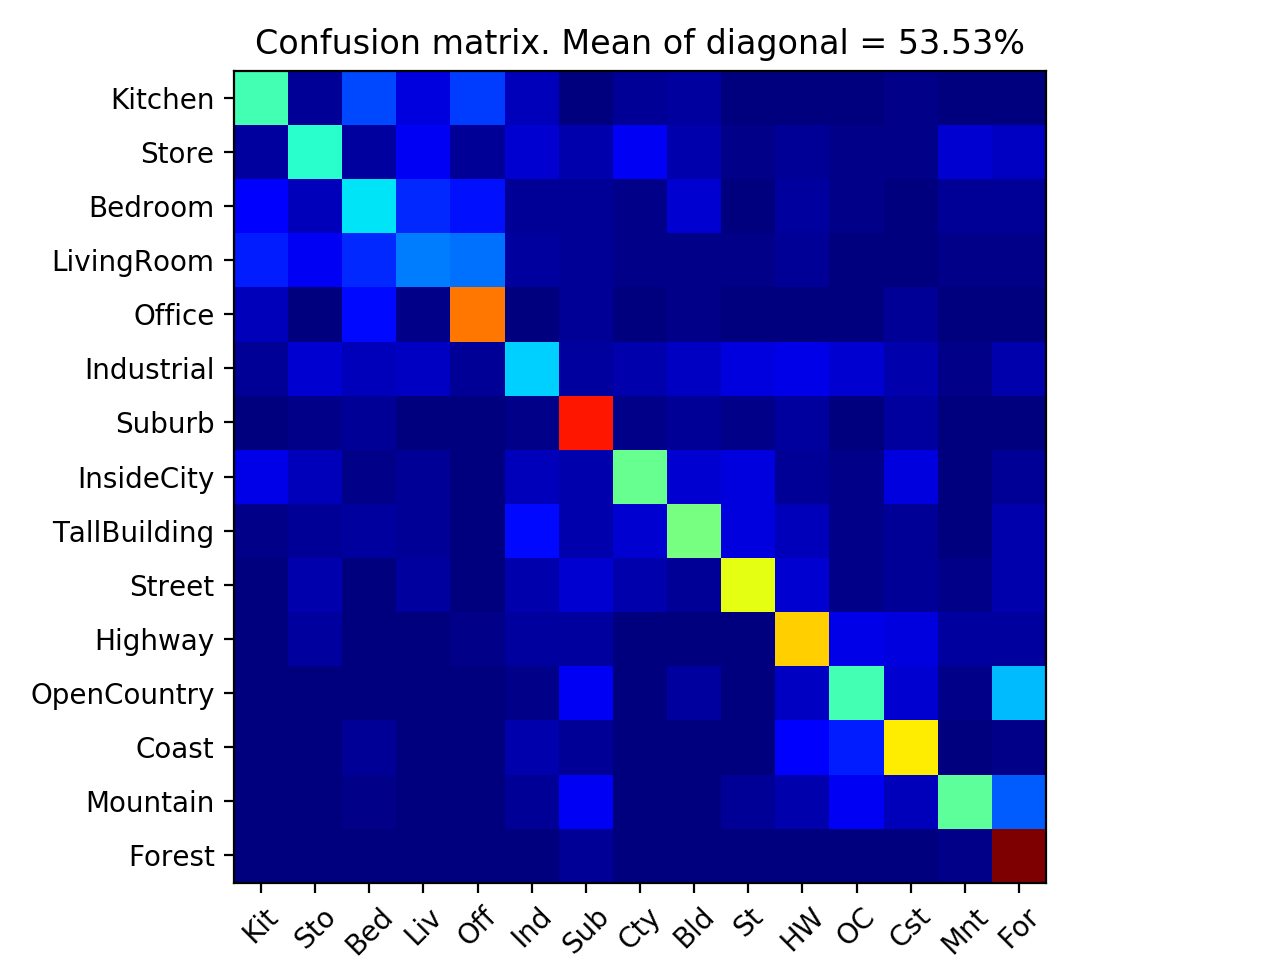

Using the BAG-OF-SIFT representation for images and 20-NEAREST NEIGHBOR classifier with L2 as distance measure to predict test set categories


<IPython.core.display.Javascript object>


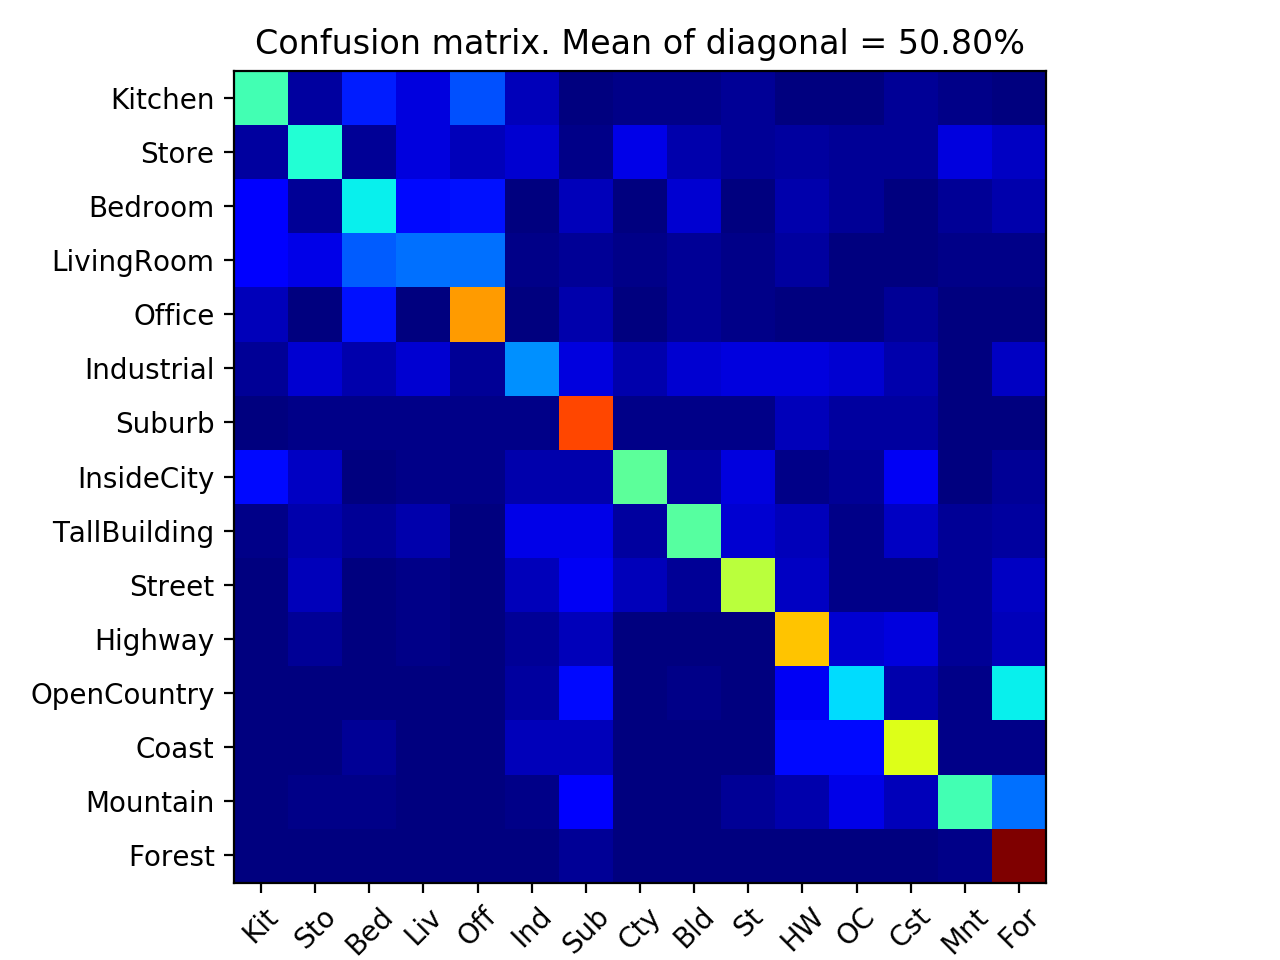

Using the BAG-OF-SIFT representation for images and 50-NEAREST NEIGHBOR classifier with L2 as distance measure to predict test set categories


<IPython.core.display.Javascript object>


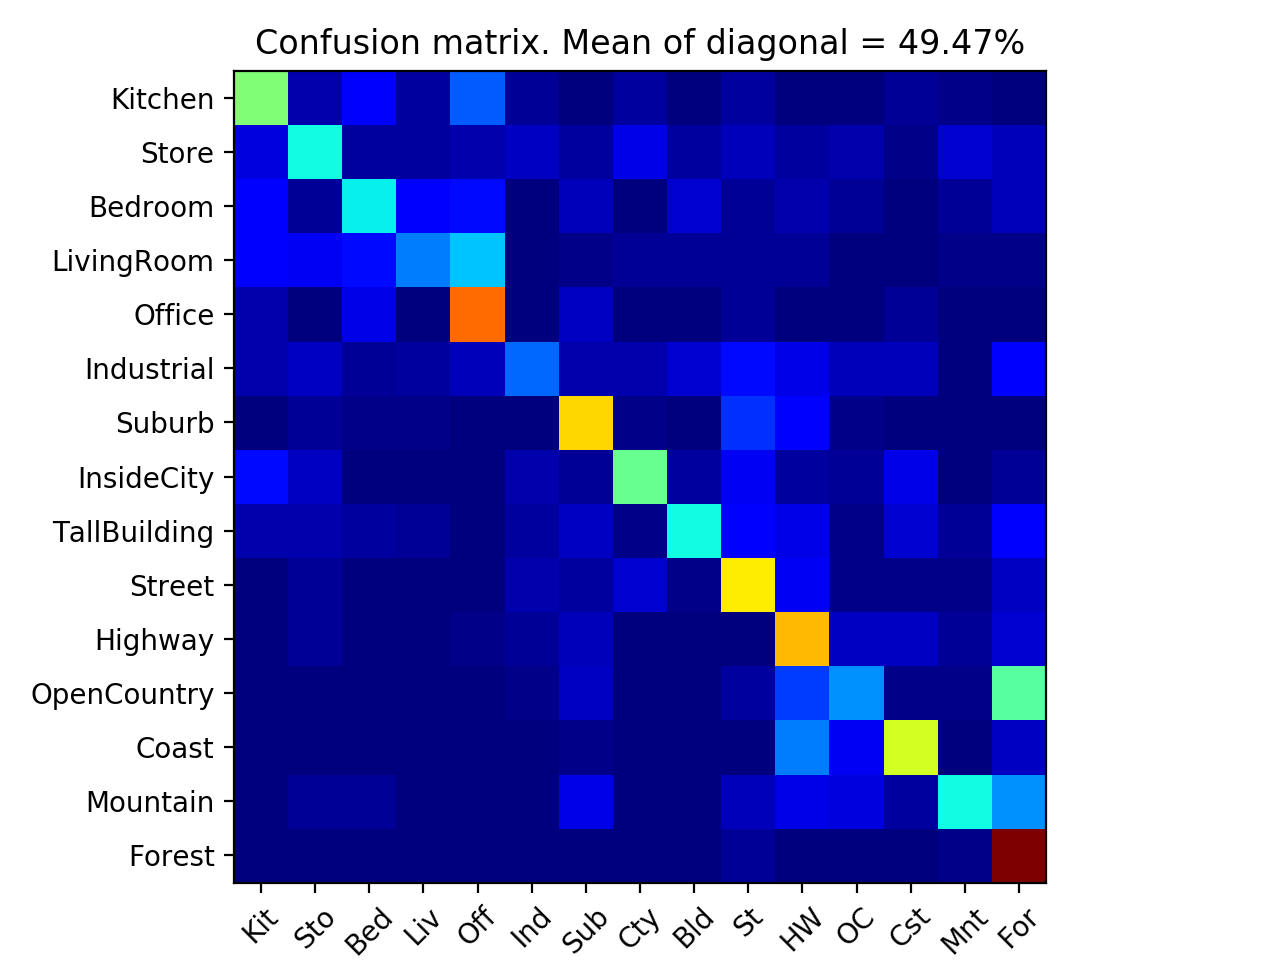

Using the BAG-OF-SIFT representation for images and 100-NEAREST NEIGHBOR classifier with L2 as distance measure to predict test set categories


<IPython.core.display.Javascript object>


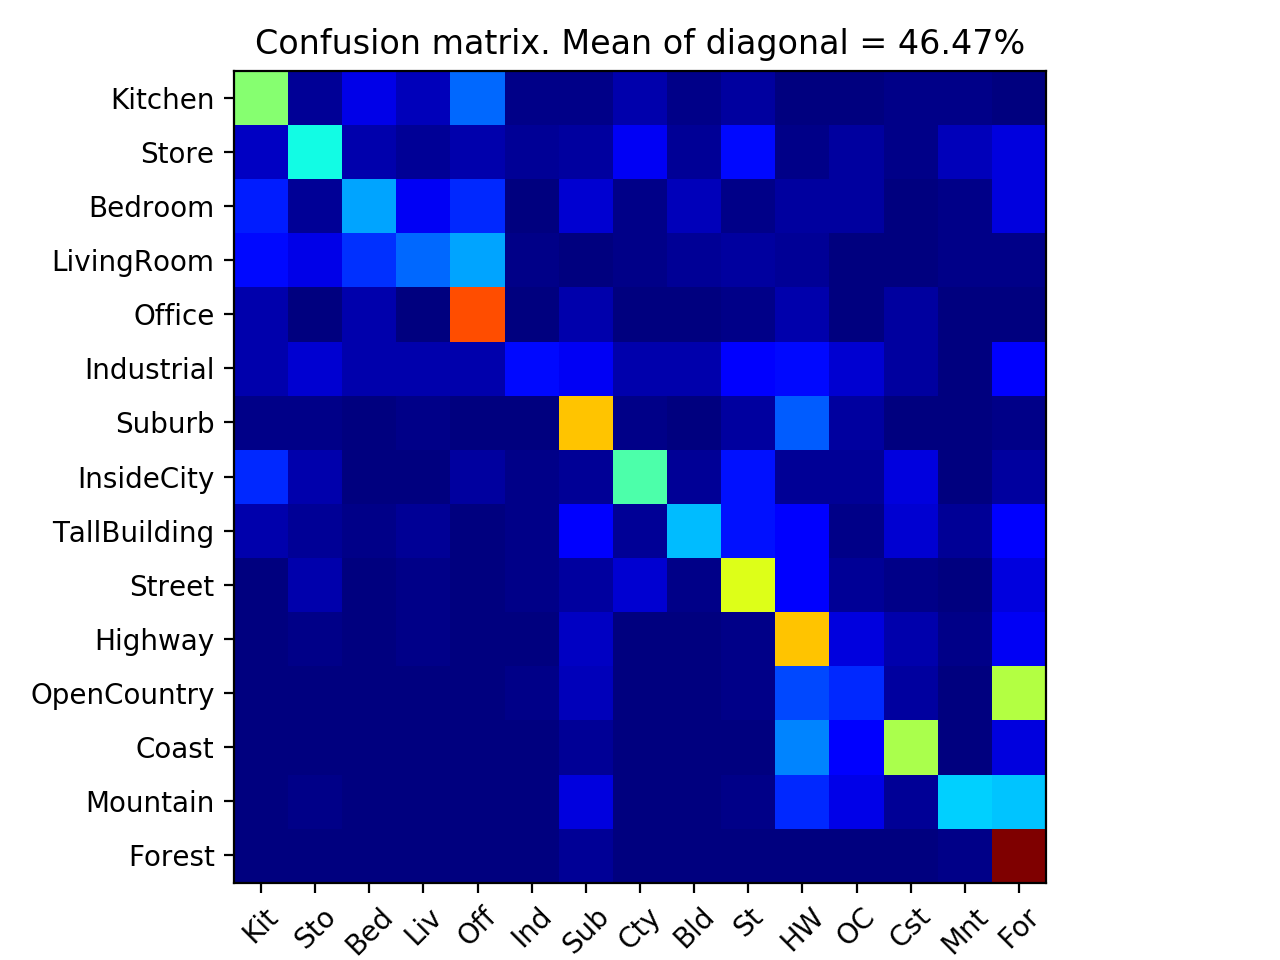

In [27]:
# Codeprint('Using the BAG-OF-SIFT representation for images')

train_image_feats = sc.get_bags_of_sifts(train_image_paths, vocab_filename)
test_image_feats = sc.get_bags_of_sifts(test_image_paths, vocab_filename)
for L in [1, 2]:
    for k in [1, 3, 5, 10, 20, 50, 100]:
        predicted_categories = sc.nearest_neighbor_classify(train_image_feats, train_labels, test_image_feats, k_size=k, DM=L)
        print('Using the BAG-OF-SIFT representation for images and {:d}-NEAREST NEIGHBOR classifier with L{:d} as distance measure to predict test set categories'.format(k, L))
        show_results(train_image_paths, test_image_paths, train_labels, test_labels, categories, abbr_categories,
             predicted_categories)

The plot below shows the variation of k-NN clasifier accuracy with k and distance matrix (L1/L2)
The tune parameters are k=5 and L1 as distance matrix


/Users/diwakar/anaconda3/envs/cs4476p4/lib/python3.5/site-packages/matplotlib/pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


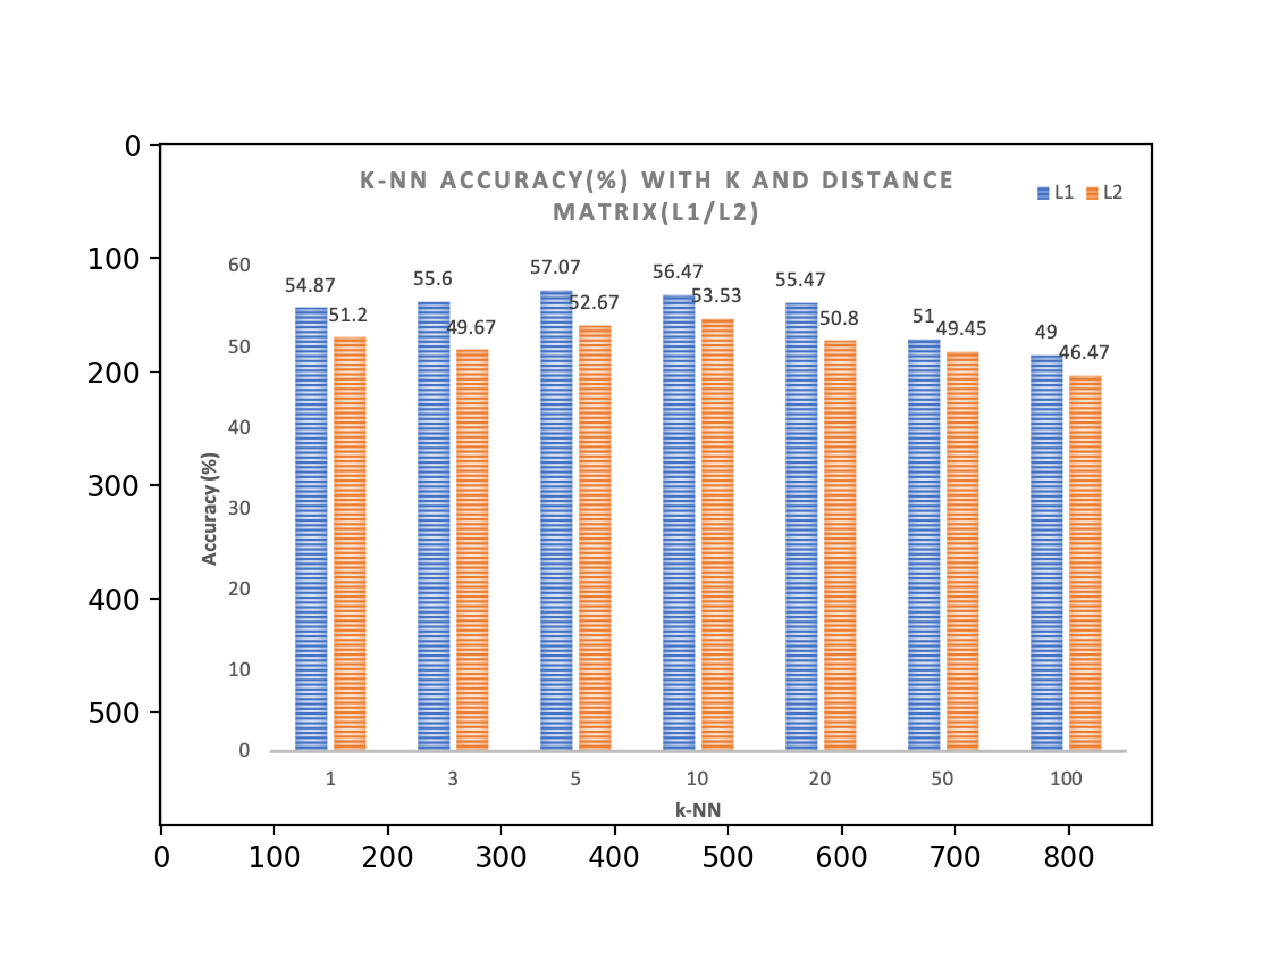

In [33]:
print('The plot below shows the variation of k-NN clasifier accuracy with k and distance matrix (L1/L2)')
print('The tune parameters are k=5 and L1 as distance matrix')
image = load_image('../code/Figures/tune.png')
plt.figure(); 
plt.imshow(image)

## Experimental Design

An important aspect of machine learning is to estimate "good" hyper-parameters. As part of this project, you will perform the following three experiments and analyze the results in your writeup:

#### 1. Use cross-validation to measure performance rather than the fixed test / train split provided by the starter code. Randomly pick 100 training and 100 testing images for each iteration and report average performance and standard deviations.

### Average Performance of Base Code, using random test-train sets
A 5-fold cross-validation is used which splits the trsining data into 5 equal folds, 4 of them are used for training and 1 for validation. For each iteration on validation fold, the performance is evaluated and averaged across different fields. The experimentation was done using the default values for each algorithm.

/Users/diwakar/anaconda3/envs/cs4476p4/lib/python3.5/site-packages/matplotlib/pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


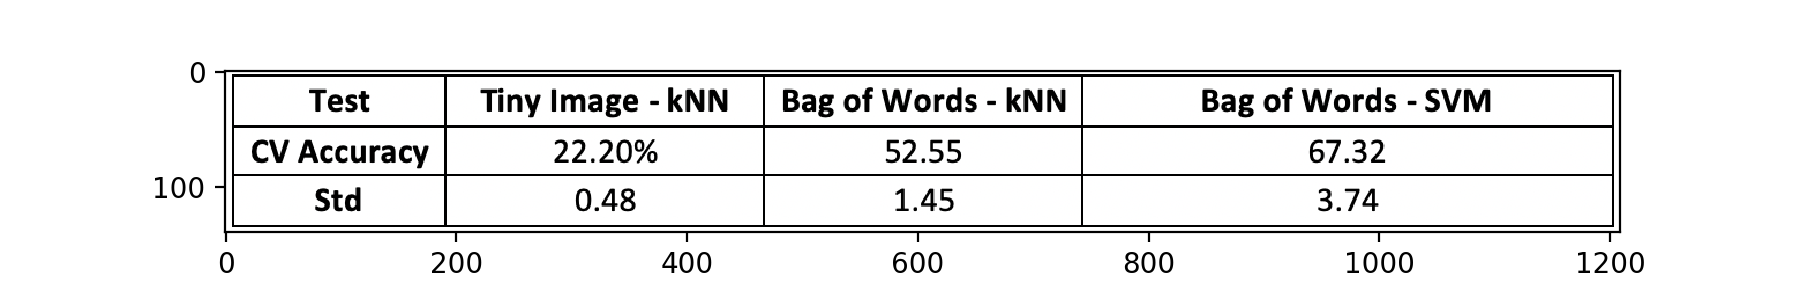

In [34]:
image = load_image('../code/Figures/Avg_performance.png')
plt.figure(figsize=(9,1.5)); 
plt.imshow(image)

#### 2. Add a validation set to your training process to tune learning parameters. This validation set could either be a subset of the training set or some of the otherwise unused test set.

### Hyperparameter tuning using Cross Validation
Hyperparameters tunes were-

1. Patch Size for Tiny Images: 8, 16, 24 and 32 pizel patches
2. k in kNN: [1, 3, 5, 10, 20, 50, 100]
3. penalty parameter C in SVM: 0.5, 1, 3, 5, 10, 15

These were done using a 5 fold cross validation, and highest average performance was verified to give true highest performance on the test set. 

The Optimal values of the parameters obtained was-
1. Patch Size for Tiny Images: KNN didnt care about patch size, 16 was slightly higher. SVM had vast improvement with patch size = 16x16
2. k in kNN: 5
3. penalty parameter C in SVM: 1

#### 3. Experiment with many different vocabulary sizes and report performance. E.g. 10, 20, 50, 100, 200, 400, 1000, 10000.

### Different vocabulary sizes 

Performance of Bag of Words using different Vocabulary Sizes was done, using 10, 20, 50, 100, 200, 400, 1000 and 10000 as the dictionary size. 

/Users/diwakar/anaconda3/envs/cs4476p4/lib/python3.5/site-packages/matplotlib/pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


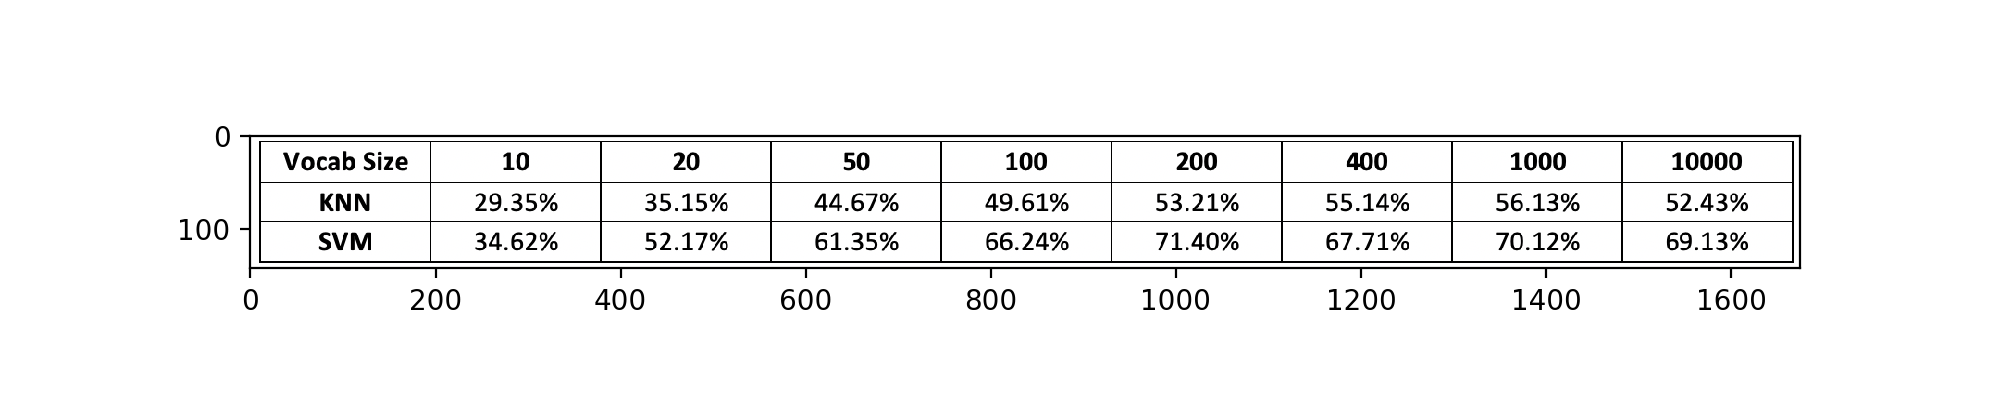

In [35]:
image = load_image('../code/Figures/vocab_sizes.png')
plt.figure(figsize=(10,2)); 
plt.imshow(image)

# Extra Credit:- Bells and Whistles (Optional)

For all extra credit, be sure to include quantitative analysis showing the impact of the particular method you've implemented. Each item is "up to" some amount of points because trivial implementations may not be worthy of full extra credit. Most of the extra credit focuses on the final bag of words + SVM pipeline of the project, not the baseline tiny image and nearest neighbor methods.

## Feature representation extra credit:

+ up to 10 pts: Experiment with features at multiple scales. E.g. sampling features from different levels of a Gaussian pyramid.

## Feature quantization and bag of words extra credit:

+ up to 10 pts: Use "soft assignment" to assign visual words to histogram bins. Each visual word will cast a distance-weighted vote to multiple bins. This is called "kernel codebook encoding" by Chatfield et al..

## Classifier extra credit:

+ up to 10 pts: Train the SVM with more sophisticated kernels such as Gaussian/RBF, L1, or chi-sqr. Try using the 'kernel' and 'gamma' arguments in scikit-learn's SVC method.
+ up to 10 pts: Try and improve the nearest neighbor classifier to be competitive or better than the linear SVM using the method of Boiman, Schechtman, and Irani, CVPR 2008.

## Extra Credit 1:- Classifier Extra Credit

### SVM trained with RBF kernel

/Users/diwakar/anaconda3/envs/cs4476p4/lib/python3.5/site-packages/matplotlib/pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


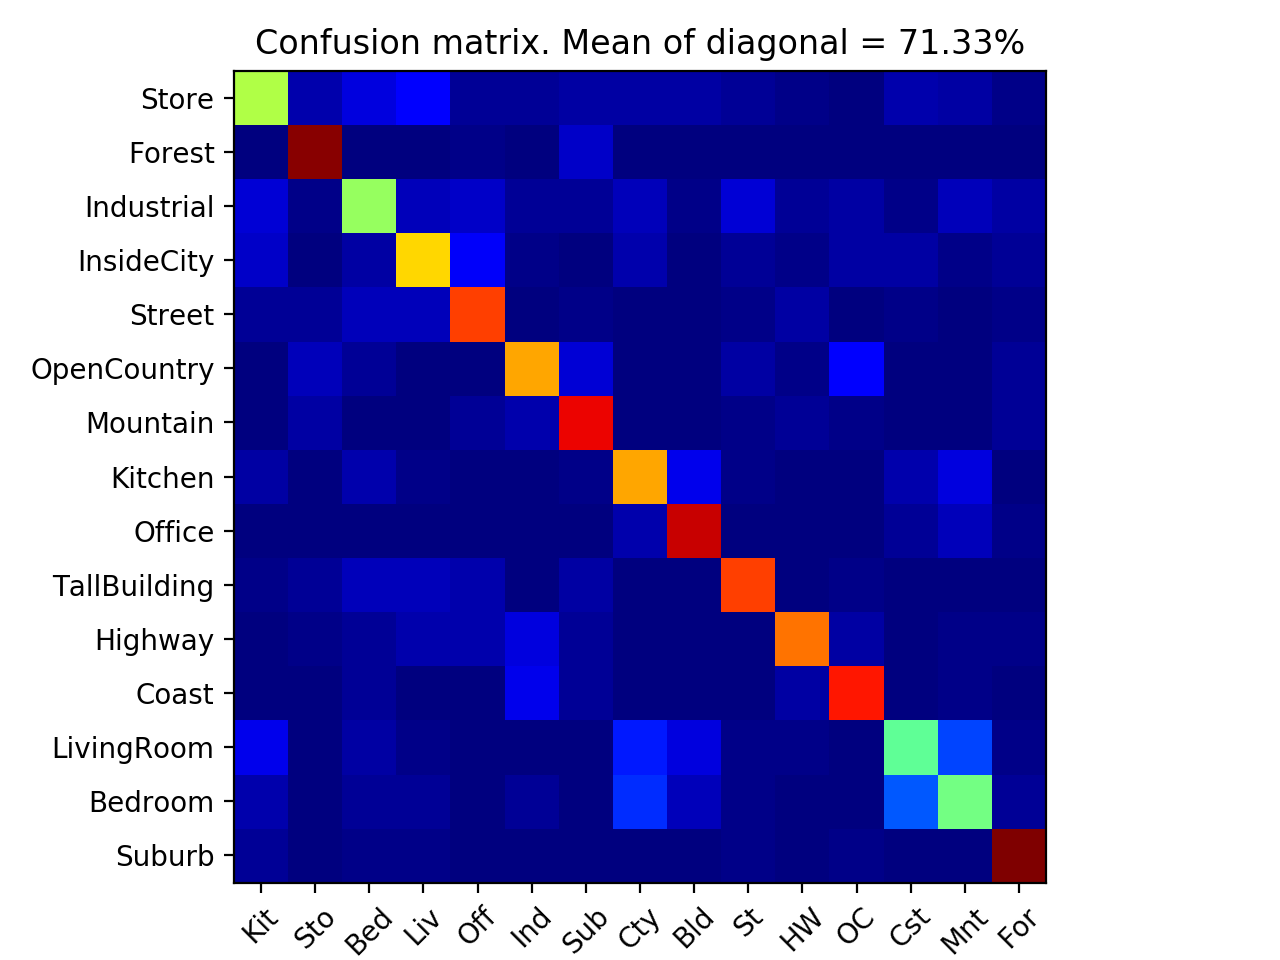

In [38]:
from sklearn.svm import SVC

# All the defined categories
categories = list(set(train_labels))

# Construct 1 vs all linear SVMs classification for each category
svms = {cat: SVC(C=15, kernel='rbf', gamma=0.1, tol=1e-3, decision_function_shape='ovr') for cat in categories}
  
for cat in categories:
    labels = []
    for c in train_labels:
        if (c == cat):
            labels.append(1)
        else:
            labels.append(-1)
    labels = np.array(labels)   # Classifying test data as 1 and -1 for each category
    svms[cat].fit(train_image_feats, labels)    # Fit the model according to the given training data for each category

# Test image features are evaluated with all 15 SVMs
confidences = np.array([svms[cat].decision_function(test_image_feats) for cat in categories])
  
# Most confident SVM governs the label for the image
labels_indices = np.argmax(confidences, axis=0)
predicted_categories = [categories[index] for index in labels_indices]
show_results(train_image_paths, test_image_paths, train_labels, test_labels, categories, abbr_categories, predicted_categories)


### SVM trained with Chi-sqr kernel

/Users/diwakar/anaconda3/envs/cs4476p4/lib/python3.5/site-packages/matplotlib/pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


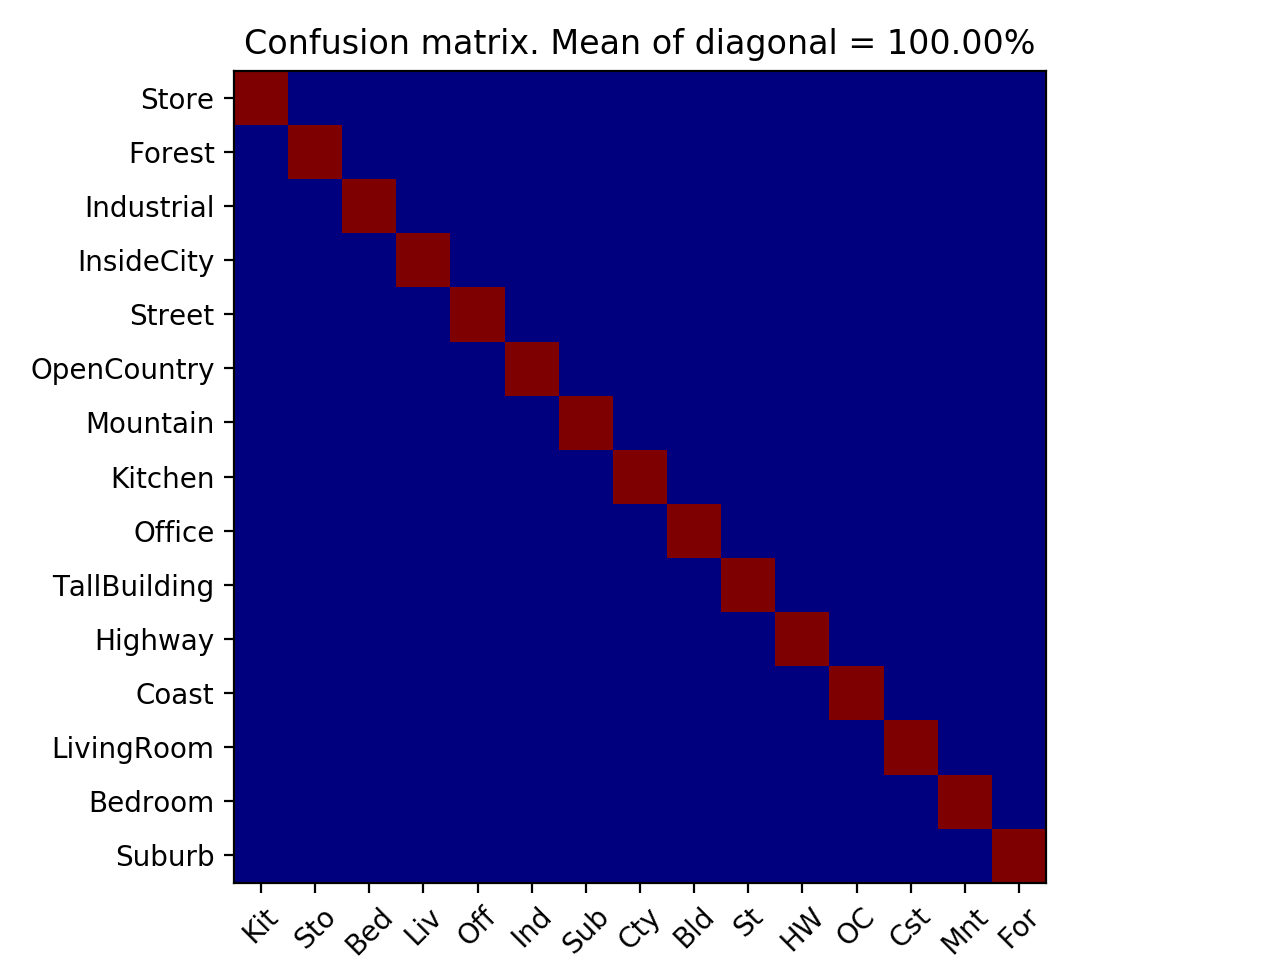

In [43]:
from sklearn.svm import SVC
from sklearn.metrics.pairwise import chi2_kernel

# All the defined categories
categories = list(set(train_labels))

a = 5
K1 = chi2_kernel(train_image_feats, gamma=a)

# Construct 1 vs all linear SVMs classification for each category
svms1 = {cat: SVC(C=1, kernel='precomputed', gamma='scale') for cat in categories}
for cat in categories:
    labels = []
    for c in train_labels:
        if (c == cat):
            labels.append(1)
        else:
            labels.append(-1)
    labels = np.array(labels)   # Classifying test data as 1 and -1 for each category
    svms1[cat].fit(K1, labels)    # Fit the model according to the given training data for each category

# Test image features are evaluated with all 15 SVMs
K2 = chi2_kernel(test_image_feats, gamma=a)
confidences = np.array([svms1[cat].decision_function(K2) for cat in categories])
  
# Most confident SVM governs the label for the image
labels_indices = np.argmax(confidences, axis=0)
predicted_categories = [categories[index] for index in labels_indices]
show_results(train_image_paths, test_image_paths, train_labels, test_labels, categories, abbr_categories, predicted_categories)


When used Chi-sqr as kernel in SVM, the accuracy obtained is 100% when gamma=5. The accuracy varries significantly with gamma. For instance, the accuracy obtained is just 50% for gamma = 0.01.
The 100% accuracy is bewildering at first but if you look closely the hyperparameters tuned is for test images only and hence for unseen images, the accuracy will get lower.